#  Country Data Hands On

* O Dataset utilizado nesse hands on contem alguns dados sociais e econômicos de diversos países. Através desses dados busca-se agrupar cada país em um grupo de países com características semelhantes. E posteriormente elencar quais são as características diferencia cada grupo.

* Autor: Misael P. C. Alves

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

## Coleta de Dados:

* O Dataset Country-Data encontra-se disponível no Kaggle pelo link: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

* Após download do Kaggle o mesmo foi alocado em uma pasta no Google Drive.

 

In [51]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Country_Data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Country_Data


## Carregando os dados e primeiras impressões:


In [52]:
data=pd.read_csv('Country-data.csv')
df=data.copy()
df.shape

(167, 10)

In [53]:
df.head()

country  child_mort  exports  ...  life_expec  total_fer   gdpp
0          Afghanistan        90.2     10.0  ...        56.2       5.82    553
1              Albania        16.6     28.0  ...        76.3       1.65   4090
2              Algeria        27.3     38.4  ...        76.5       2.89   4460
3               Angola       119.0     62.3  ...        60.1       6.16   3530
4  Antigua and Barbuda        10.3     45.5  ...        76.8       2.13  12200

[5 rows x 10 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [55]:
df.duplicated().sum()

0

* O Dataset possui 10 colunas, sendo 9 delas numéricas e 1 qualitativa.

* Nenhuma coluna possui valores ausentes.

* Não há linhas duplicadas.

* Dicionário de dados:

  * Country: Indica o País.
  * child_mort: Morte de crianças abaixo de 5 anos a cada 1000 nascimentos.
  * exports: Porcentagem GDP per capita referente a Exportação de Bens e Serviços.
  * health: Porcentagem GDP per capita referente a gastos com saúde.
  * imports: Porcentagem GDP per capita referente a Importação de Bens e Serviços.
  * income: Renda Líquida per capita.
  * inflation: Medida da taxa de crescimento anual do GDP Total. (Inflação)
  * life_expec: Expectativa média de anos de vida esperada para crianças recém-nascidas.
  * total_fer: Número de filhos esperado por mulher em idade fértil.
  * gdpp: Gross Domestic Product per capita (Produto interno bruto per capita).

## Tratamento de dados:



* Alguns atributos no Dataset original estão em função do atributo gdpp(Gross Domestic Product per capita) como mostra o dicionário acima. 
 
* Um novo dataset contendo essas **transfromações** será criado e as **distribuições comparadas**
 * Exemplo:
    exports=(exports/100)*gdpp

In [56]:
df1=data.copy()

coluna=list(df1.columns)
del coluna[5:]
del coluna[0:2]
print(coluna) 
for col in coluna:
  df1[col]=((df1[col]*df1['gdpp'])/100)
;

['exports', 'health', 'imports']


''

In [57]:
df_logtransf=df1.drop('country', axis=1).copy()
df_logtransf['child_mort']=np.log(df1['child_mort'])
df_logtransf['imports']=np.log(df1['imports'])
df_logtransf['health']=np.log(df1['health'])
df_logtransf['exports']=np.log(df1['exports'])
df_logtransf['income']=np.log(df1['income'])
#df_logtransf['inflation']=np.log1p(df1['inflation'])                    
df_logtransf['gdpp']=np.log(df1['gdpp'])                                                         

* Com o intuito de aproximar a distribuição dos dados a normal, uma transformação usando log foi aplicada nas colunas acima.

* Há 2 motivos para a transformação, o primeiro é que o algoritmo PCA obtém uma melhor performance com distribuições de dados próximos a normal. A transformação também tem a intenção de 'remover' a presença de outliers nos atributos, oq também ira afetar a positivamente os algoritmos de clustering, pois os mesmos usam medidas de distância como base da sua operação. Além de relaçar relações já existentes nos dados.

* 2 motivos influenciaram a não transformação de alguns atributos, são eles:
  * A transformação não teve impacto significativo na distribuição dos dados.
  * A transformação gerou 'Nan' devido a presença de valores negativos como no atributo **inflation**.


In [58]:
from sklearn.preprocessing import  RobustScaler
rb_scaler=RobustScaler()
data_rb=rb_scaler.fit_transform(df_logtransf)
df_rb=pd.DataFrame(data_rb,columns=df_logtransf.columns)
df_rb.insert(0,'country',df1['country'])
df_rb

country  child_mort   exports  ...  life_expec  total_fer      gdpp
0            Afghanistan    0.763543 -1.245126  ...   -1.469565   1.635492 -0.904371
1                Albania   -0.074626 -0.157731  ...    0.278261  -0.364508 -0.055359
2                Algeria    0.171722 -0.013326  ...    0.295652   0.230216 -0.018613
3                 Angola    0.900757  0.076396  ...   -1.130435   1.798561 -0.117837
4    Antigua and Barbuda   -0.310959  0.408614  ...    0.321739  -0.134293  0.408361
..                   ...         ...       ...  ...         ...        ...       ...
162              Vanuatu    0.205040 -0.089768  ...   -0.878261   0.522782 -0.191130
163            Venezuela   -0.059931  0.277091  ...    0.200000   0.028777  0.451323
164              Vietnam    0.093268 -0.227360  ...    0.000000  -0.220624 -0.538439
165                Yemen    0.530144 -0.541487  ...   -0.486957   1.083933 -0.538439
166               Zambia    0.722946 -0.427339  ...   -1.834783   1.434053 -0.492441

[167 rows x 10 columns]

* usando Robust Scaler os dados foram padronizados levando em conta o intervalo inter quartil. 

    - X_scaled= (X-Q1)/(Q3-Q1)


In [59]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_quantile=df1.drop('country',axis=1).copy()

data_quantile=scaler.fit_transform(df_quantile)
df_quantile=pd.DataFrame(data=data_quantile, columns=df_quantile.columns)
df_quantile.insert(0,'country',df1['country'])
;

''

* Outro conjuto de dados foi criado a partir do DF1 mas dessa vez a padronização foi feita utilizando o Quantile Transformer, que transforma a distribuição da variável para normal, e após isso padroniza os valores de cada atributo.

* Válido ressaltar que o Quantile Transformer pode afetar as relações lineares entre as variáveis.

* Abaixo na análise descritiva o impacto de cada transformação será visualizada.

In [60]:
from sklearn.preprocessing import  RobustScaler
rb_scaler=RobustScaler()
data_sc=rb_scaler.fit_transform(df.drop('country', axis=1))
df_sc=pd.DataFrame(data_sc,columns=df.drop('country', axis=1).columns)
df_sc.insert(0,'country',df1['country'])


## Análise Explorátoria dos Dados 

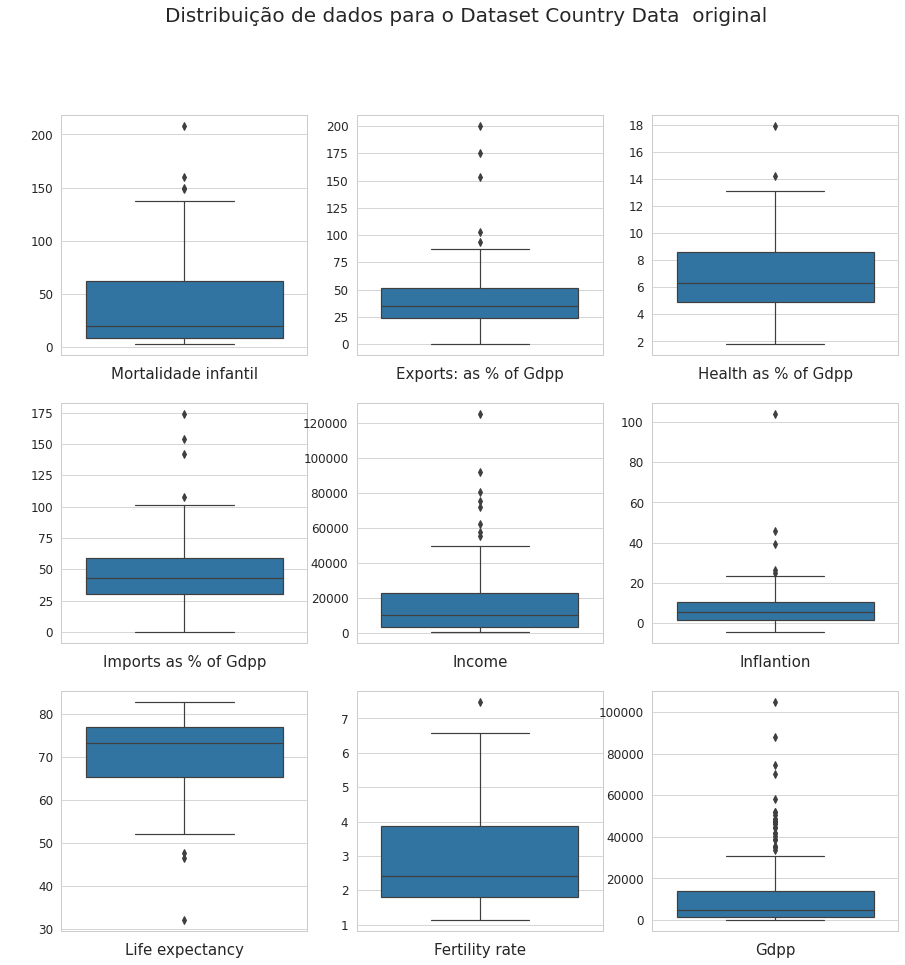

In [61]:
# https://www.redalyc.org/journal/840/84064925007/html/
sns.set_style('whitegrid')
fig,axs=plt.subplots(3,3,figsize=(15,15))

fig.suptitle('Distribuição de dados para o Dataset Country Data  original', size=20)

dat=df.drop('country', axis=1)
fs=15
ls=12
sns.boxplot(data=dat,y='child_mort', ax=axs[0,0])
axs[0,0].set_ylabel(' ')
axs[0,0].set_xlabel('Mortalidade infantil',fontsize=fs)
axs[0,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='exports',ax=axs[0,1])
axs[0,1].set_ylabel(' ')
axs[0,1].set_xlabel('Exports: as % of Gdpp',fontsize=fs)
axs[0,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='health',ax=axs[0,2])
axs[0,2].set_ylabel(' ')
axs[0,2].set_xlabel('Health as % of Gdpp',fontsize=fs)
axs[0,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='imports',ax=axs[1,0])
axs[1,0].set_ylabel(' ')
axs[1,0].set_xlabel('Imports as % of Gdpp',fontsize=fs)
axs[1,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='income',ax=axs[1,1])
axs[1,1].set_ylabel(' ')
axs[1,1].set_xlabel('Income',fontsize=fs)
axs[1,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='inflation',ax=axs[1,2])
axs[1,2].set_ylabel(' ')
axs[1,2].set_xlabel('Inflantion',fontsize=fs)
axs[1,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='life_expec',ax=axs[2,0])
axs[2,0].set_ylabel(' ')
axs[2,0].set_xlabel('Life expectancy',fontsize=fs)
axs[2,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='total_fer',ax=axs[2,1])
axs[2,1].set_ylabel(' ')
axs[2,1].set_xlabel('Fertility rate',fontsize=fs)
axs[2,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='gdpp',ax=axs[2,2])
axs[2,2].set_ylabel(' ')
axs[2,2].set_xlabel('Gdpp',fontsize=fs)
axs[2,2].tick_params(axis='y', which='major', labelsize=ls)



Achados:

* A uma grande presença de outliers em algumas variáveis: Gdpp, Income, Exports, Imports e Health.

* As variáveis possuem distribuição assimétrica.

* Apesar da presença de outliers impactarem na tarefa de agrupamento, excluir ou altera-los não é uma opção viável. O dataset ter poucas instâncias, cada ponto seja outlier ou não, representa um país.

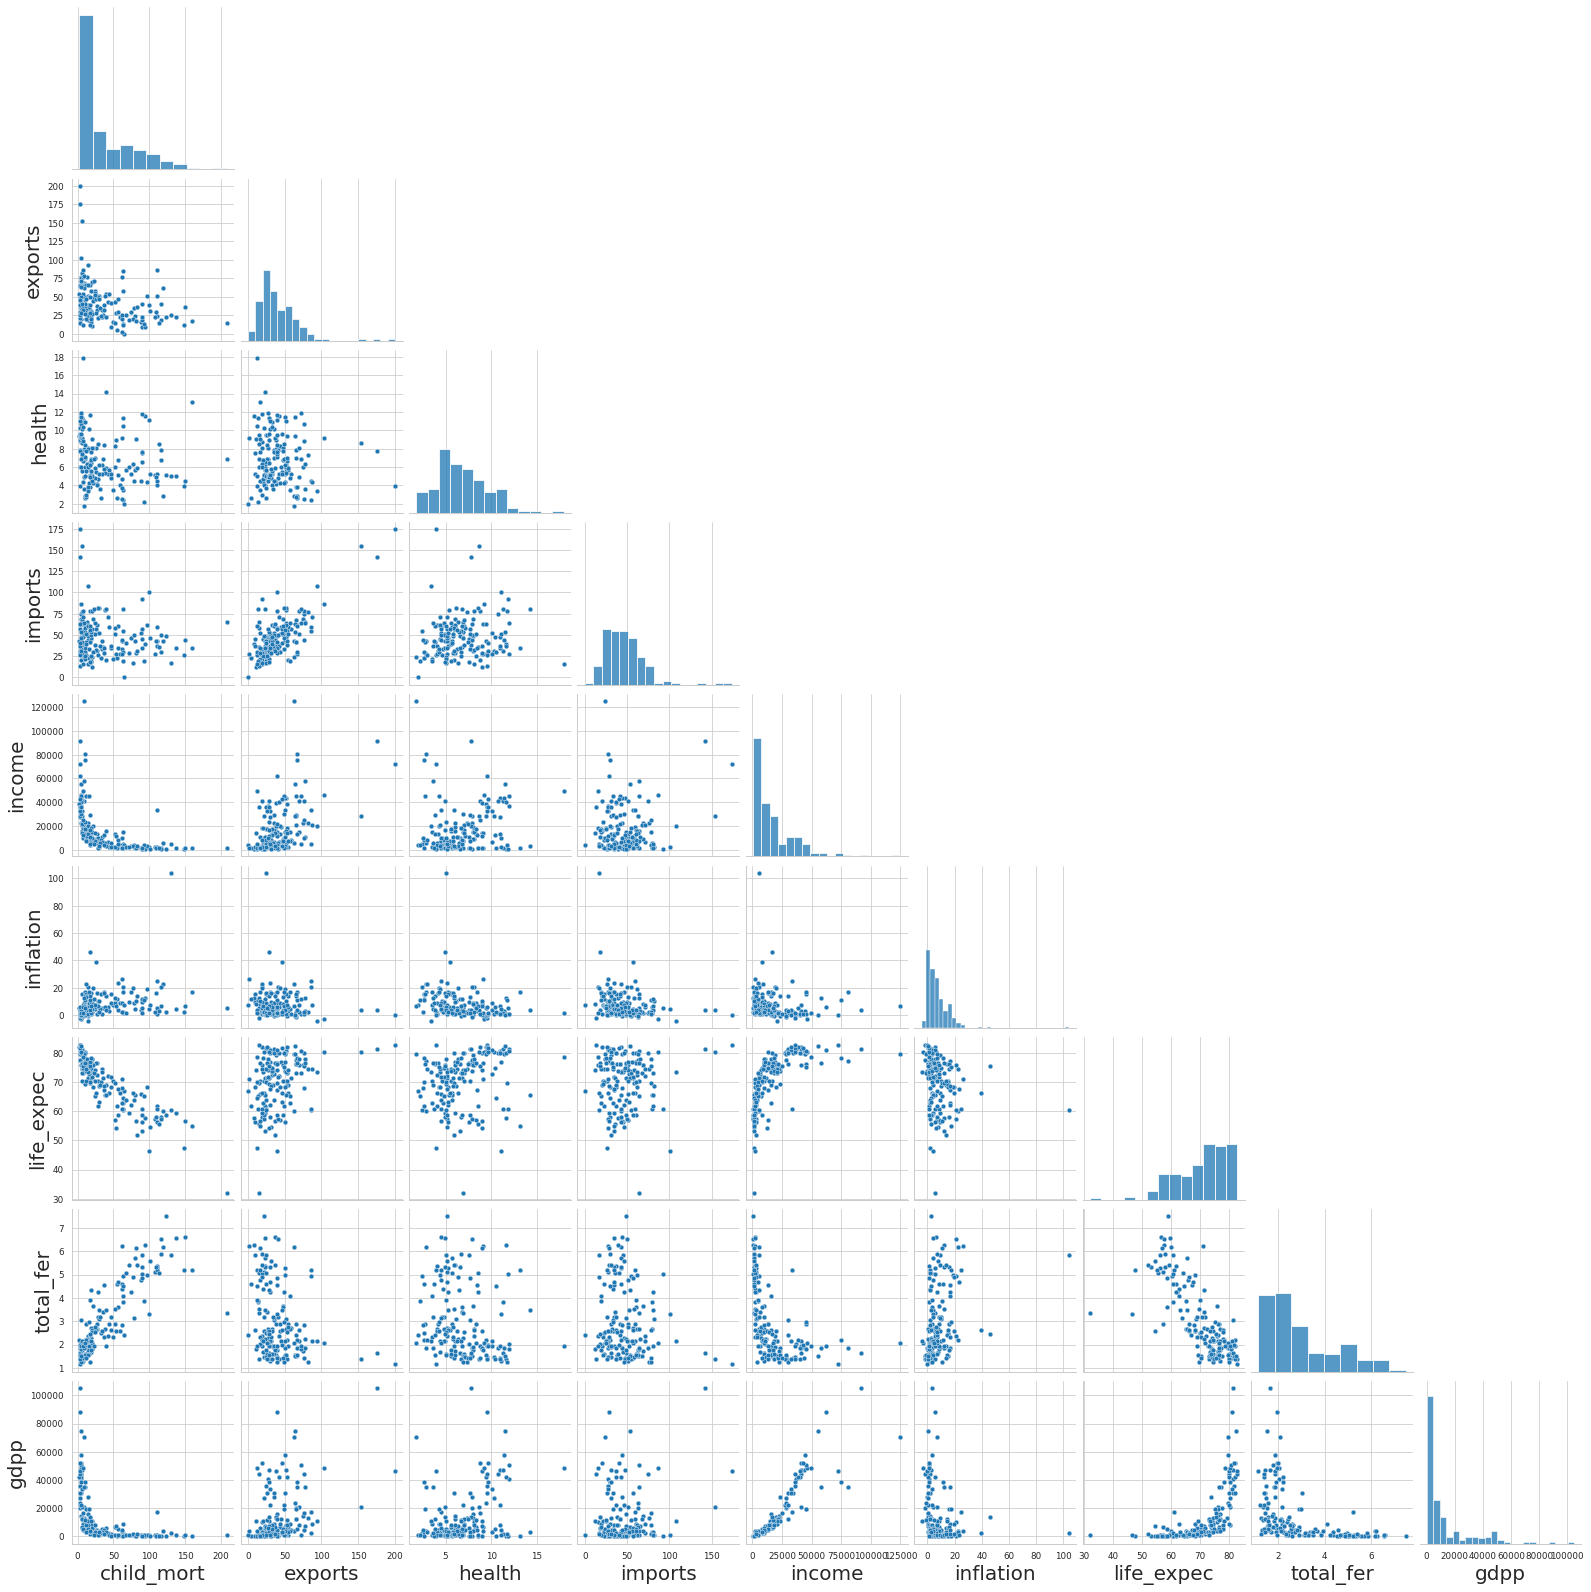

In [62]:
sns.set_context("paper", rc={"axes.labelsize":20})
sns.pairplot(df.drop('country', axis=1), palette='bright', corner=True)

In [63]:
X=df['child_mort'].values.reshape(-1,1) # gdpp e income
Y=df['life_expec'].values.reshape(-1,1)# 'life_expec' df[['total_fer','life_expec']].values.reshape(-1,2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X, Y)

from sklearn.metrics import r2_score
print(r2_score(regressor.predict(X), Y))

0.7280501224828402


* Analisando o scatter pair plot poucas relações lineares são observadas. 

* As relações lineares observadas são entre as variáveis: child_mort com life_expec e total_fer e gdpp e income

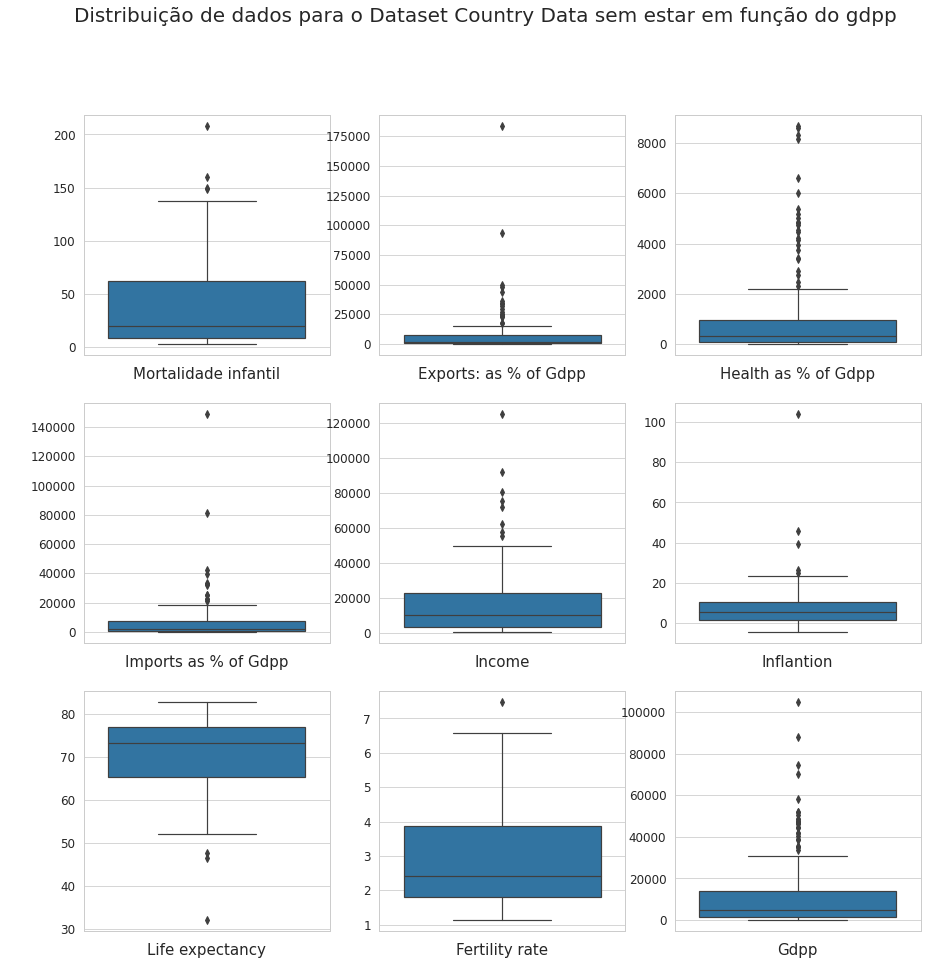

In [64]:
# https://www.redalyc.org/journal/840/84064925007/html/
sns.set_style('whitegrid')
fig,axs=plt.subplots(3,3,figsize=(15,15))

fig.suptitle('Distribuição de dados para o Dataset Country Data sem estar em função do gdpp ', size=20)

dat=df1
fs=15
ls=12
sns.boxplot(data=dat,y='child_mort', ax=axs[0,0])
axs[0,0].set_ylabel(' ')
axs[0,0].set_xlabel('Mortalidade infantil',fontsize=fs)
axs[0,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='exports',ax=axs[0,1])
axs[0,1].set_ylabel(' ')
axs[0,1].set_xlabel('Exports: as % of Gdpp',fontsize=fs)
axs[0,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='health',ax=axs[0,2])
axs[0,2].set_ylabel(' ')
axs[0,2].set_xlabel('Health as % of Gdpp',fontsize=fs)
axs[0,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='imports',ax=axs[1,0])
axs[1,0].set_ylabel(' ')
axs[1,0].set_xlabel('Imports as % of Gdpp',fontsize=fs)
axs[1,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='income',ax=axs[1,1])
axs[1,1].set_ylabel(' ')
axs[1,1].set_xlabel('Income',fontsize=fs)
axs[1,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='inflation',ax=axs[1,2])
axs[1,2].set_ylabel(' ')
axs[1,2].set_xlabel('Inflantion',fontsize=fs)
axs[1,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='life_expec',ax=axs[2,0])
axs[2,0].set_ylabel(' ')
axs[2,0].set_xlabel('Life expectancy',fontsize=fs)
axs[2,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='total_fer',ax=axs[2,1])
axs[2,1].set_ylabel(' ')
axs[2,1].set_xlabel('Fertility rate',fontsize=fs)
axs[2,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='gdpp',ax=axs[2,2])
axs[2,2].set_ylabel(' ')
axs[2,2].set_xlabel('Gdpp',fontsize=fs)
axs[2,2].tick_params(axis='y', which='major', labelsize=ls)


* No DF1 atributos imports, health e exports deixaram de estar em função do gdpp.

* Com essa alteração é possível perceber um aumento significativo da presença de outliers nessas variáveis.

* A mudança também impacta na distribuição, aumentando seu desvio.

* Com a aplicação da transformação logarítmica é esperada uma menor presença de outliers e uma aproximação das distribuições a normal

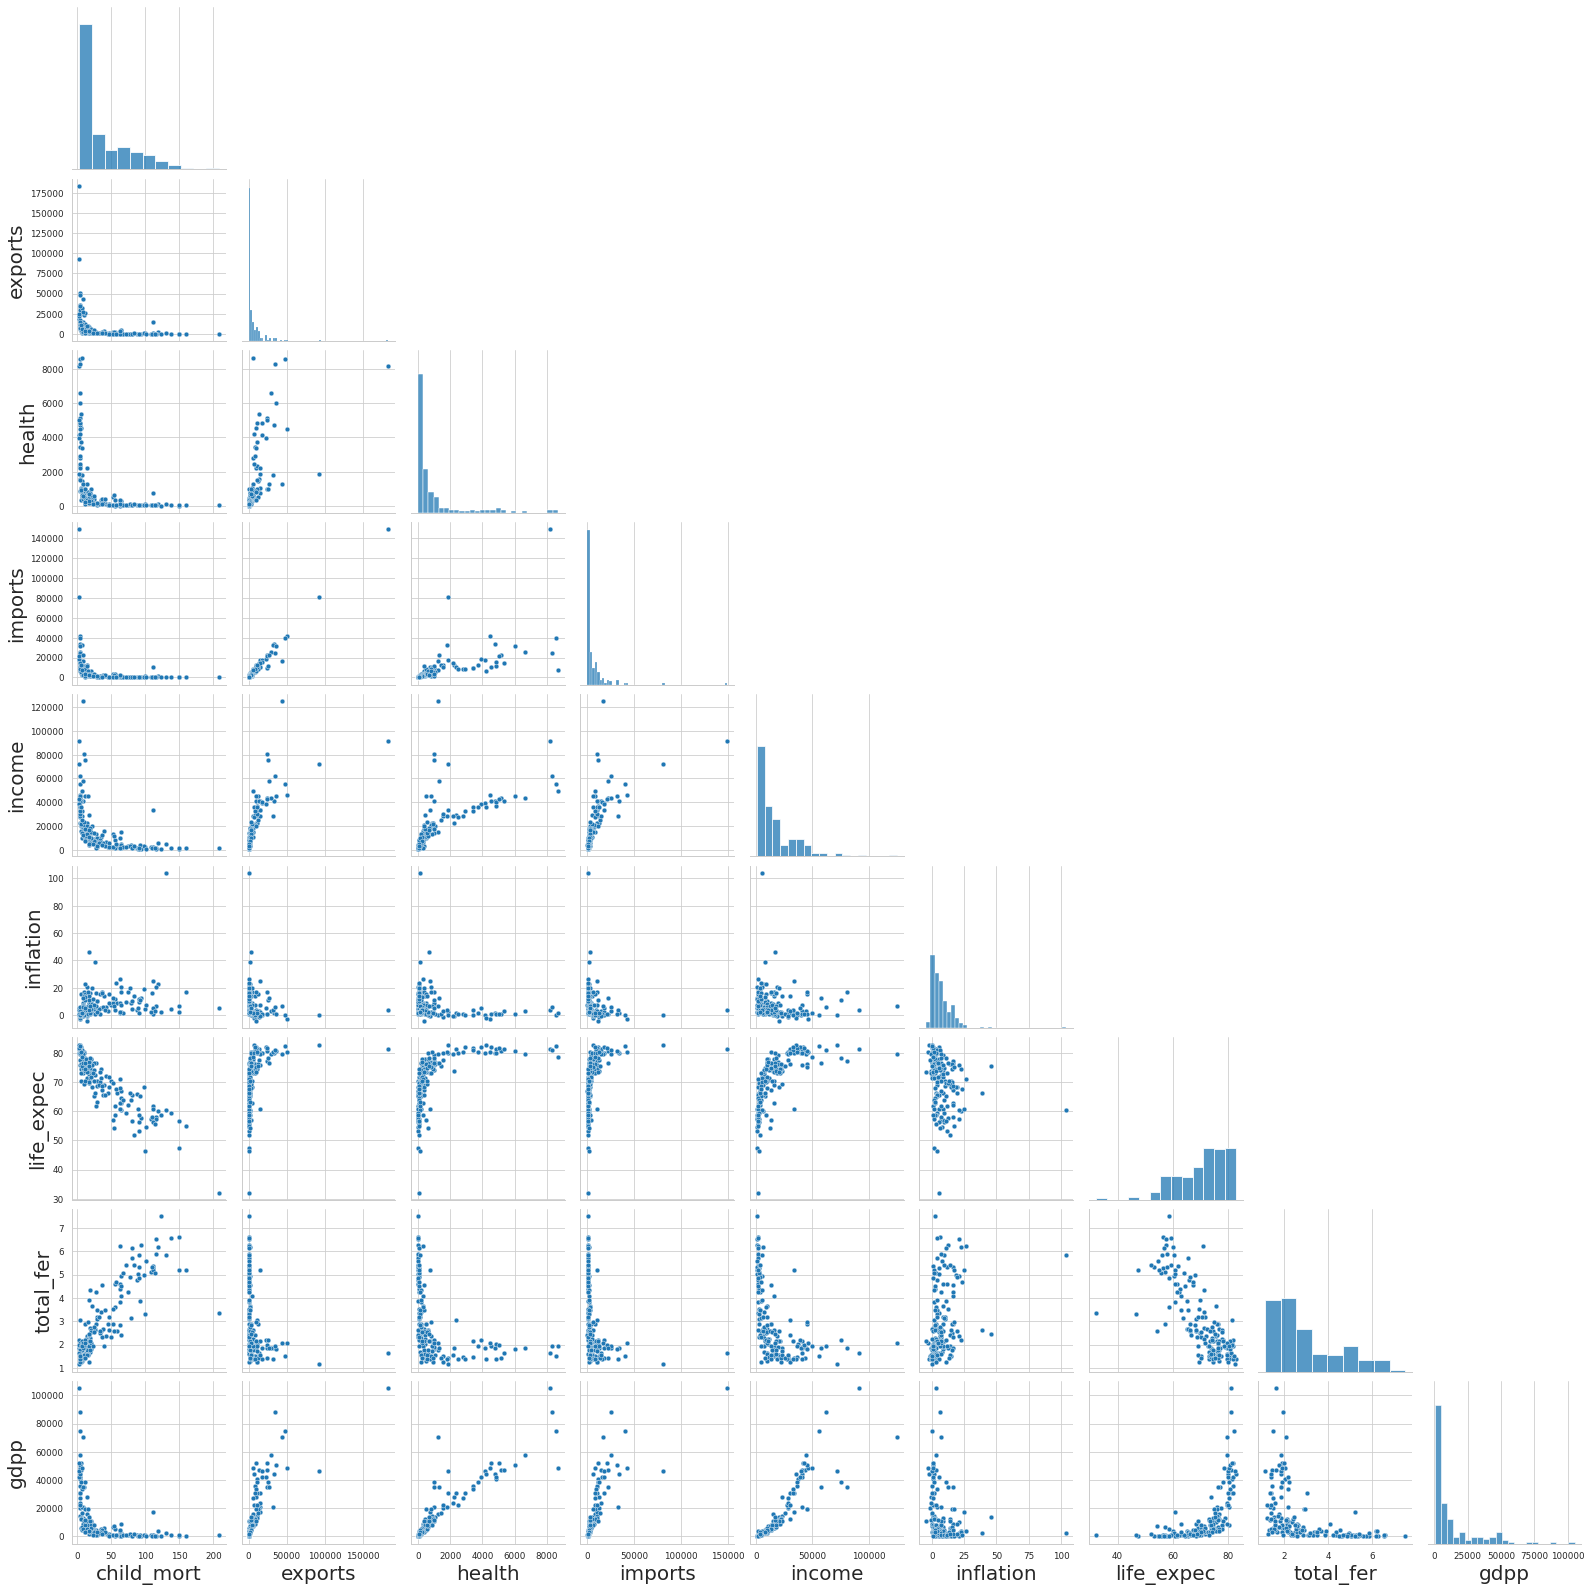

In [65]:
sns.set_context("paper", rc={"axes.labelsize":20})
sns.pairplot(df1.drop('country', axis=1), palette='bright', corner=True)

* Após as colunas deixarem de estar em função de gdpp não é observado grande diferença nas relações entre as variáveis.

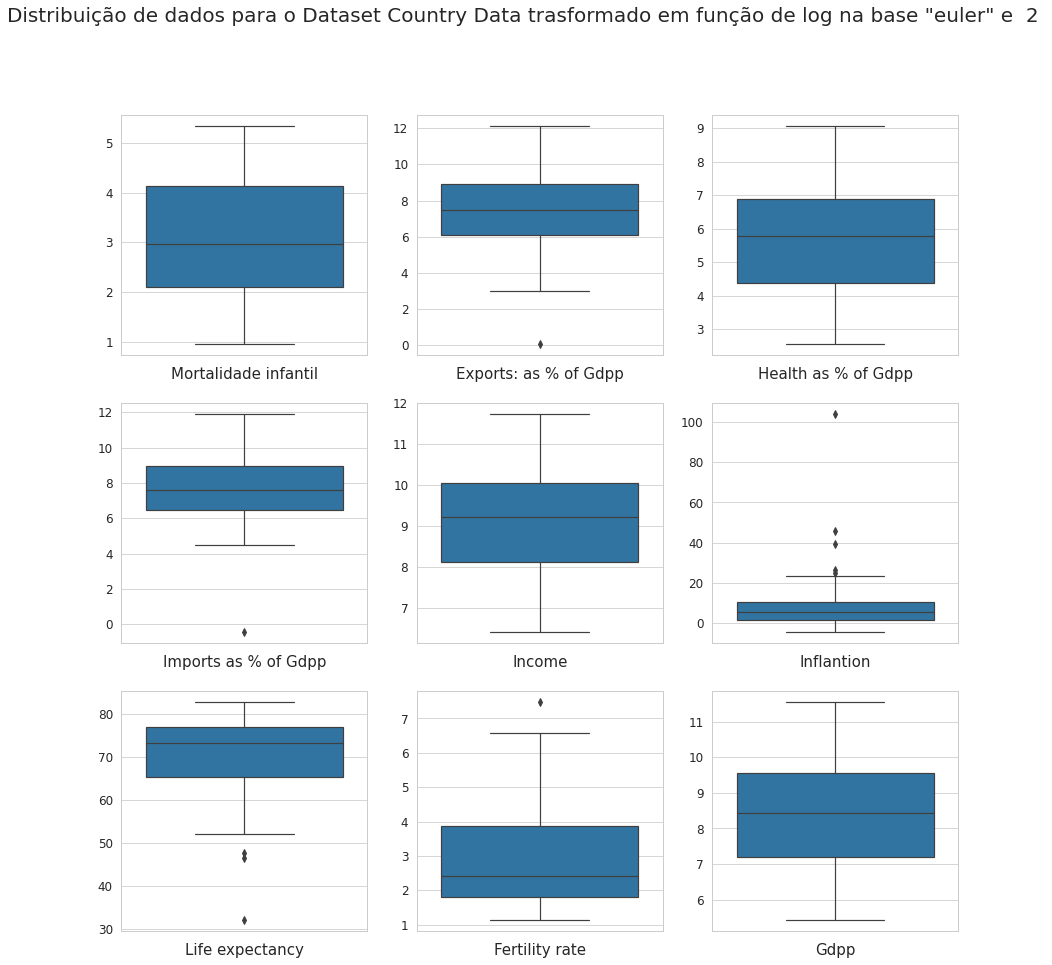

In [66]:
# https://www.redalyc.org/journal/840/84064925007/html/
sns.set_style('whitegrid')
fig,axs=plt.subplots(3,3,figsize=(15,15))

fig.suptitle('Distribuição de dados para o Dataset Country Data trasformado em função de log na base "euler" e  2 ', size=20)

dat=df_logtransf
fs=15
ls=12
sns.boxplot(data=dat,y='child_mort', ax=axs[0,0])
axs[0,0].set_ylabel(' ')
axs[0,0].set_xlabel('Mortalidade infantil',fontsize=fs)
axs[0,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='exports',ax=axs[0,1])
axs[0,1].set_ylabel(' ')
axs[0,1].set_xlabel('Exports: as % of Gdpp',fontsize=fs)
axs[0,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='health',ax=axs[0,2])
axs[0,2].set_ylabel(' ')
axs[0,2].set_xlabel('Health as % of Gdpp',fontsize=fs)
axs[0,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='imports',ax=axs[1,0])
axs[1,0].set_ylabel(' ')
axs[1,0].set_xlabel('Imports as % of Gdpp',fontsize=fs)
axs[1,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='income',ax=axs[1,1])
axs[1,1].set_ylabel(' ')
axs[1,1].set_xlabel('Income',fontsize=fs)
axs[1,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='inflation',ax=axs[1,2])
axs[1,2].set_ylabel(' ')
axs[1,2].set_xlabel('Inflantion',fontsize=fs)
axs[1,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='life_expec',ax=axs[2,0])
axs[2,0].set_ylabel(' ')
axs[2,0].set_xlabel('Life expectancy',fontsize=fs)
axs[2,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='total_fer',ax=axs[2,1])
axs[2,1].set_ylabel(' ')
axs[2,1].set_xlabel('Fertility rate',fontsize=fs)
axs[2,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='gdpp',ax=axs[2,2])
axs[2,2].set_ylabel(' ')
axs[2,2].set_xlabel('Gdpp',fontsize=fs)
axs[2,2].tick_params(axis='y', which='major', labelsize=ls)


* Após a aplicação da transformação é perceptível que a quantidade de outliers de maneira geral diminui significativamente.


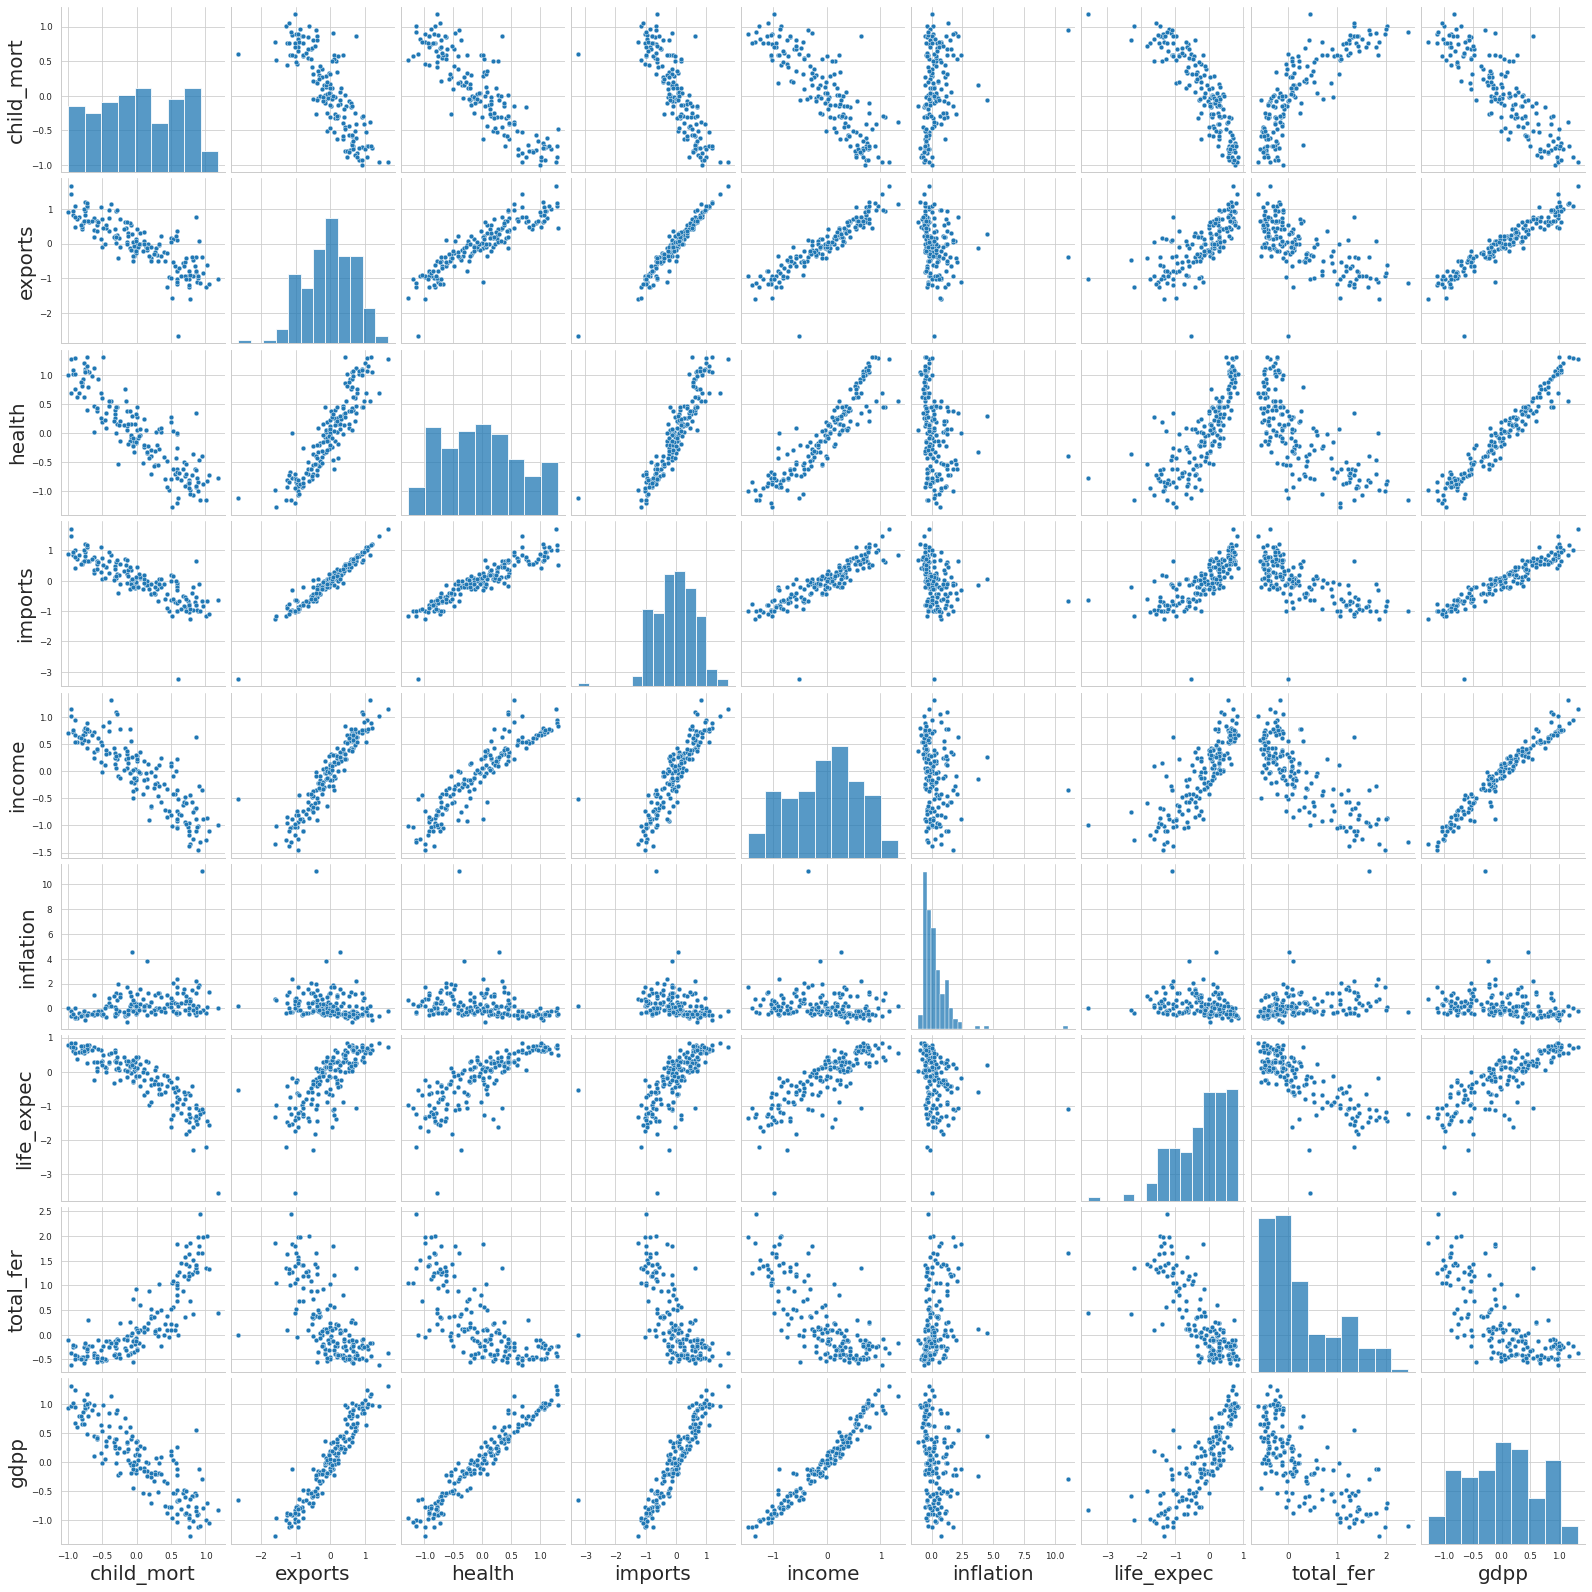

In [67]:
sns.pairplot(df_rb,palette='dark')

* A transformação logarítmica diminui significativamente o desvio presente na distribuição de algumas variáveis, ajudando na visualização dos dados e de suas relações.


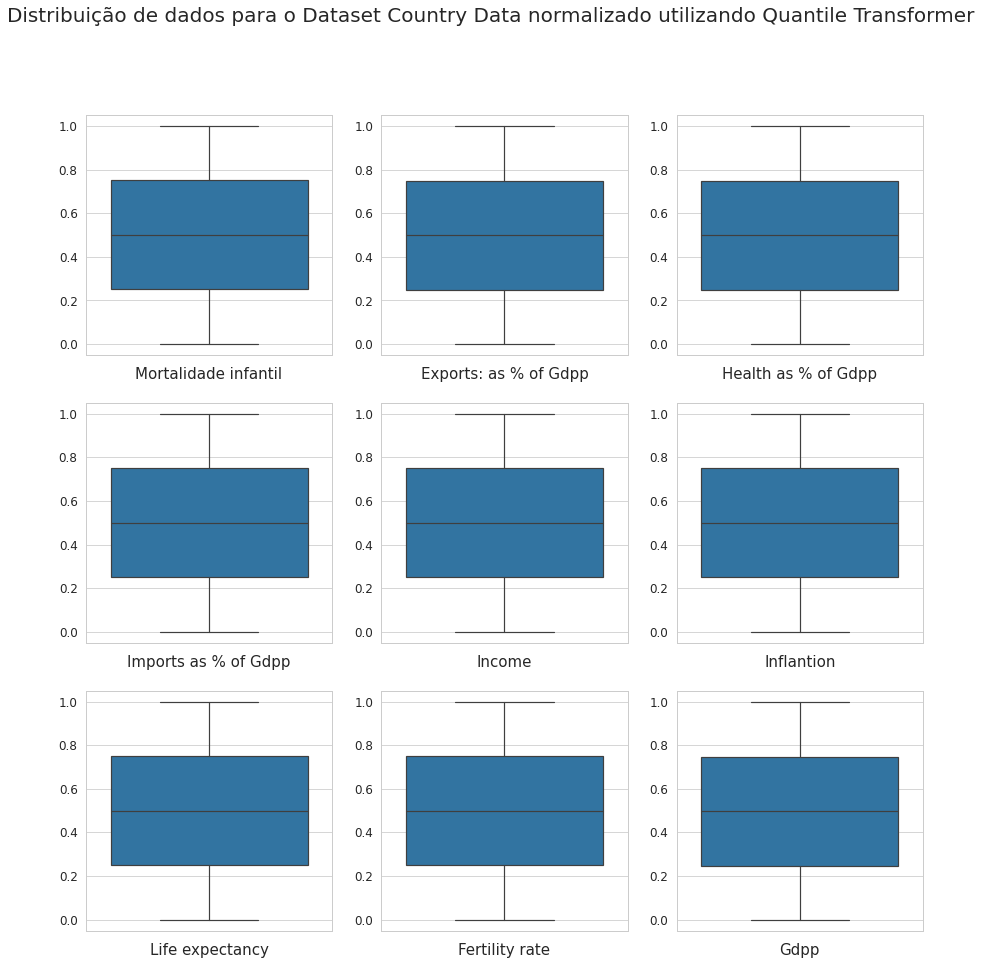

In [68]:
sns.set_style('whitegrid')
fig,axs=plt.subplots(3,3,figsize=(15,15))

fig.suptitle('Distribuição de dados para o Dataset Country Data normalizado utilizando Quantile Transformer', size=20)

dat=df_quantile
fs=15
ls=12
sns.boxplot(data=dat,y='child_mort', ax=axs[0,0])
axs[0,0].set_ylabel(' ')
axs[0,0].set_xlabel('Mortalidade infantil',fontsize=fs)
axs[0,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='exports',ax=axs[0,1])
axs[0,1].set_ylabel(' ')
axs[0,1].set_xlabel('Exports: as % of Gdpp',fontsize=fs)
axs[0,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='health',ax=axs[0,2])
axs[0,2].set_ylabel(' ')
axs[0,2].set_xlabel('Health as % of Gdpp',fontsize=fs)
axs[0,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='imports',ax=axs[1,0])
axs[1,0].set_ylabel(' ')
axs[1,0].set_xlabel('Imports as % of Gdpp',fontsize=fs)
axs[1,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='income',ax=axs[1,1])
axs[1,1].set_ylabel(' ')
axs[1,1].set_xlabel('Income',fontsize=fs)
axs[1,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='inflation',ax=axs[1,2])
axs[1,2].set_ylabel(' ')
axs[1,2].set_xlabel('Inflantion',fontsize=fs)
axs[1,2].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='life_expec',ax=axs[2,0])
axs[2,0].set_ylabel(' ')
axs[2,0].set_xlabel('Life expectancy',fontsize=fs)
axs[2,0].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='total_fer',ax=axs[2,1])
axs[2,1].set_ylabel(' ')
axs[2,1].set_xlabel('Fertility rate',fontsize=fs)
axs[2,1].tick_params(axis='y', which='major', labelsize=ls)

sns.boxplot(data=dat,y='gdpp',ax=axs[2,2])
axs[2,2].set_ylabel(' ')
axs[2,2].set_xlabel('Gdpp',fontsize=fs)
axs[2,2].tick_params(axis='y', which='major', labelsize=ls)

 * Usando Quantile Transformer a distribuição dos dados é normalizada e em seguida padronizada. 

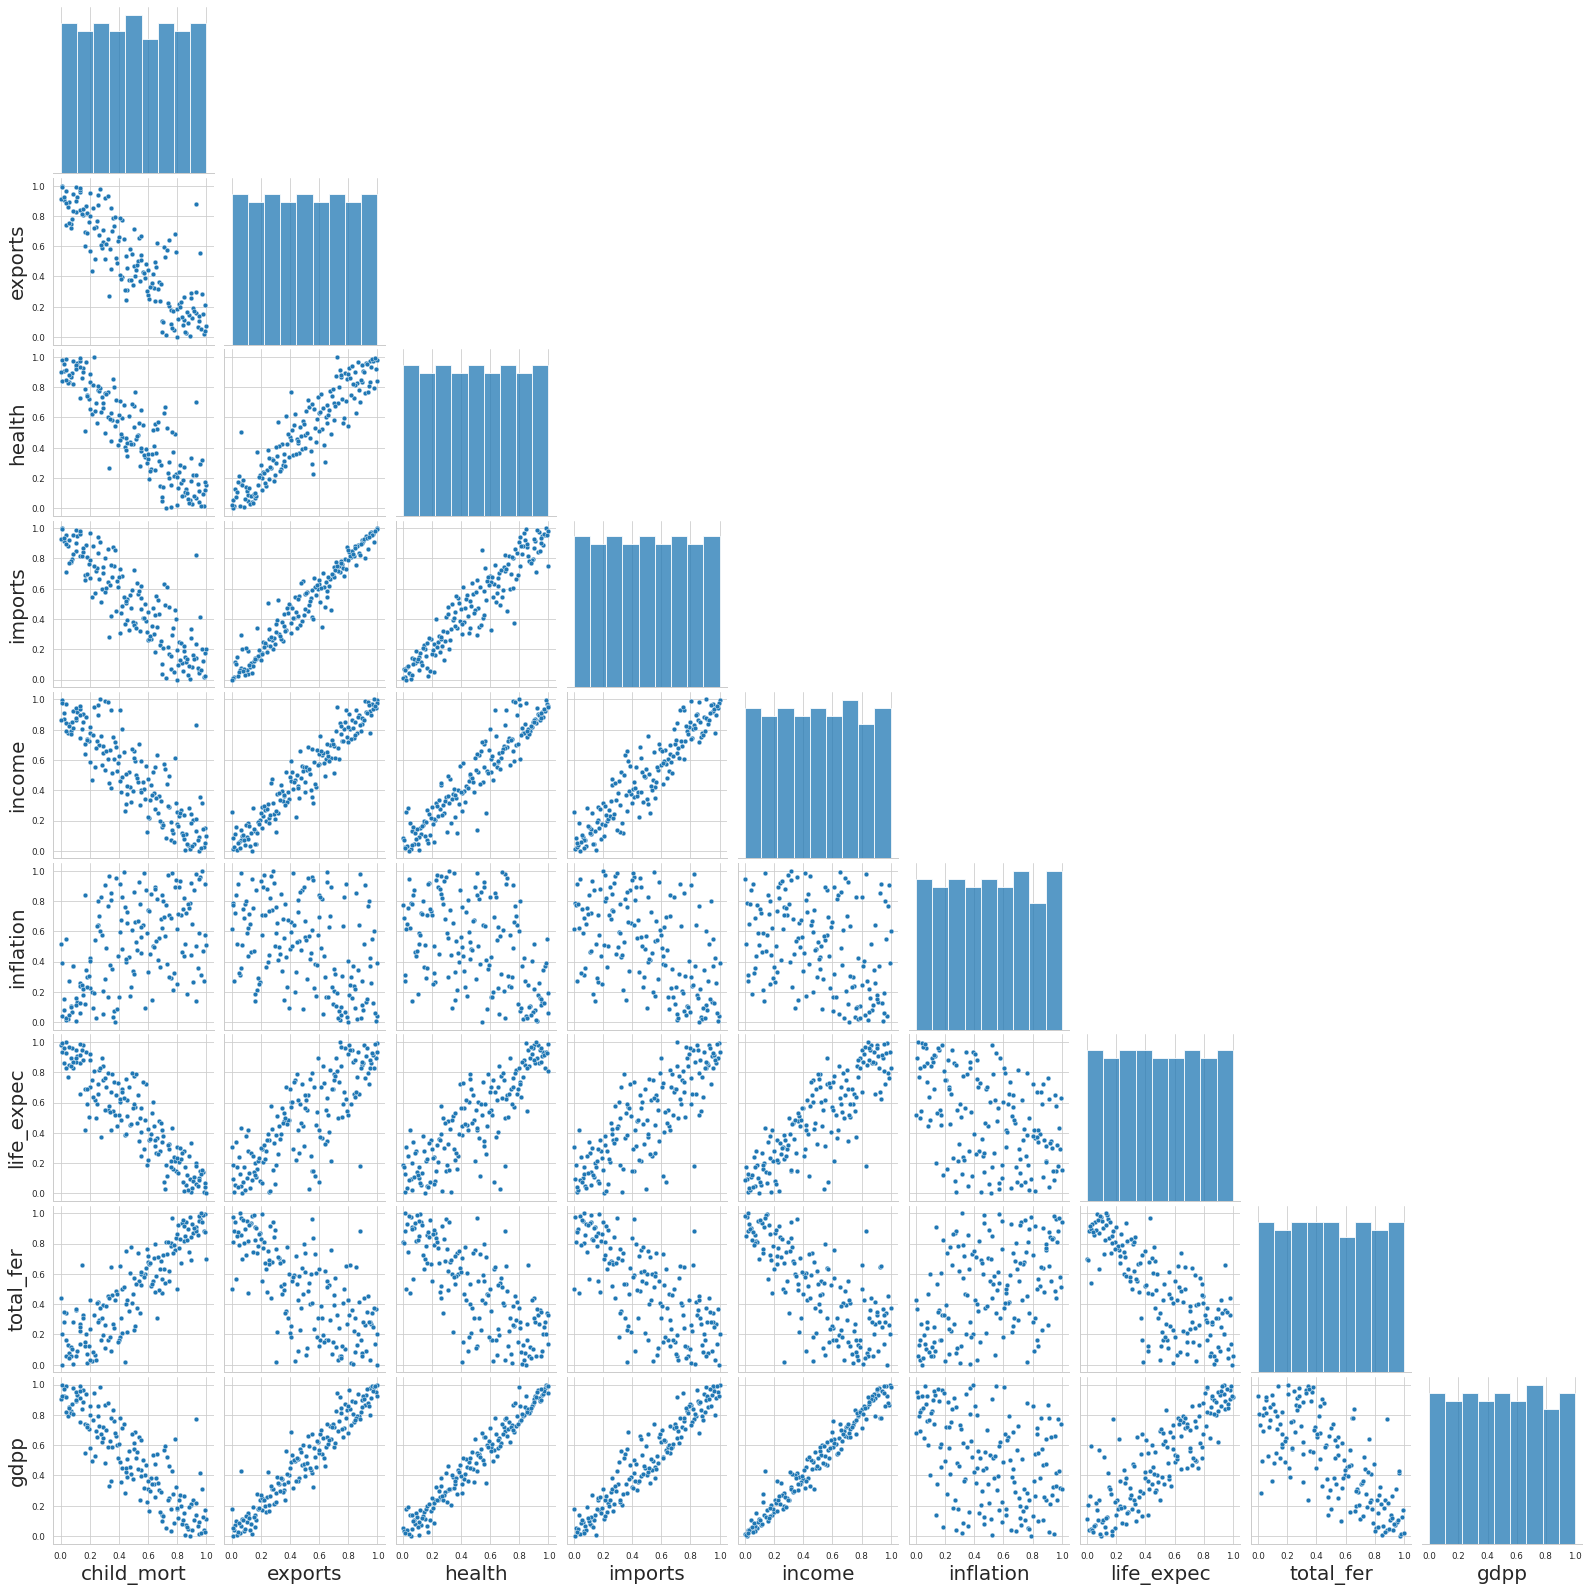

In [69]:
sns.pairplot(df_quantile.drop('country', axis=1), palette='bright', corner=True)

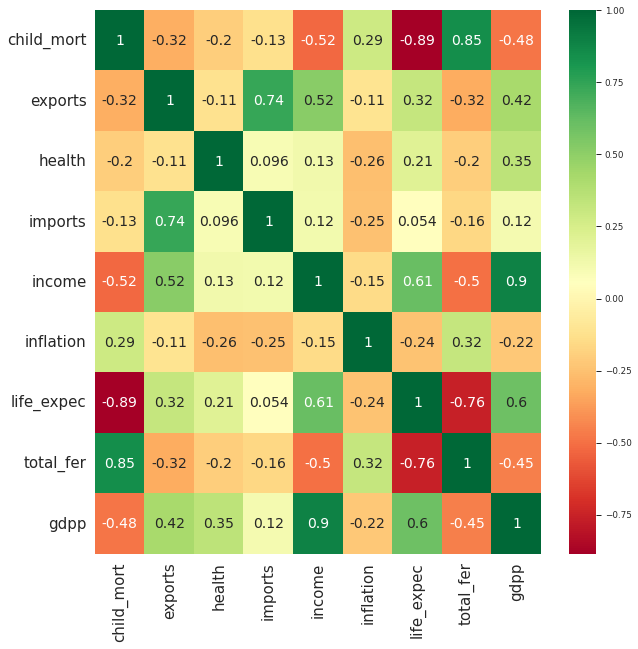

In [70]:
df_corr_scaler=pd.DataFrame(data=np.corrcoef(df.drop('country', axis=1),rowvar=False)
,index=df.drop('country', axis=1).columns, columns=df.drop('country', axis=1).columns)
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
#sns.displot(height=10, aspect=1)
sns.heatmap(data=df_corr_scaler
,square=False, annot=True, annot_kws={'size':14}, cmap="RdYlGn", cbar_kws={'shrink':1})

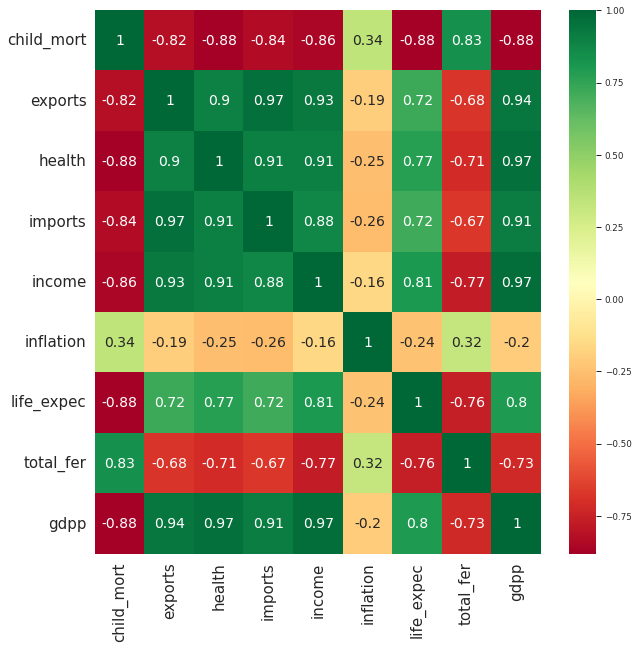

In [71]:
df_corr_scaler=pd.DataFrame(data=np.corrcoef(df_rb.drop('country', axis=1),rowvar=False)
,index=df_rb.drop('country', axis=1).columns, columns=df_rb.drop('country', axis=1).columns)
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
#sns.displot(height=10, aspect=1)
sns.heatmap(data=df_corr_scaler
,square=False, annot=True, annot_kws={'size':14}, cmap="RdYlGn", cbar_kws={'shrink':1})

* Devido a transformação támbem ocorre um aumento significativo no nível de correlação entre os atributos. 

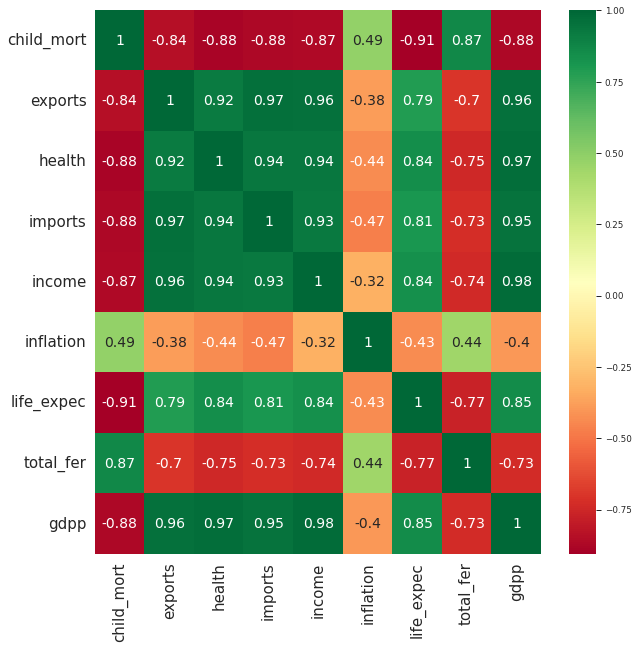

In [72]:
df_corr_scaler=pd.DataFrame(data=np.corrcoef(df_quantile.drop('country', axis=1),rowvar=False, )
,index=df_quantile.drop('country', axis=1).columns, columns=df_quantile.drop('country', axis=1).columns)
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
#sns.displot(height=10, aspect=1)
sns.heatmap(data=df_corr_scaler
,square=False, annot=True, annot_kws={'size':14}, cmap="RdYlGn", cbar_kws={'shrink':1})

* Comparando as duas figuras acima a primeira contendo os dados originais sem transformação e a segunda e terceira com os dados transformados e padronizados. Percebe-se como a transformação dos valores realçou as relações preexistentes nos dados originais.

## Modelagem 

* Depois explorar os dados e aplicar alguns métodos para de pre-processamento para melhorar a qualidade dos dados e identificar padrões o passo seguinte é a modelagem desses dados utilizando algoritmos de aprendizado não supervisionado, para dividir as observações em grupos.

* Os algoritmos usados foram o PCA, KMEAN E AGG.CLUSTERING.

* o Primeiro com a intenção de reduzir o número de dimensões condensando a informações contidas nos atributos originais em um número menor de atributos, com a menor perda possível de informação.

* Já os outros 2 algoritmos serão utilizados para separar as observações em grupos distintos dada a proximidade de cada ponto.

In [73]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

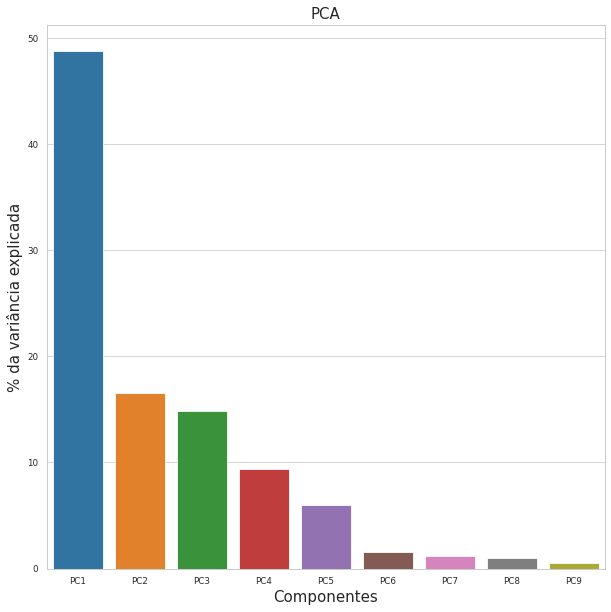

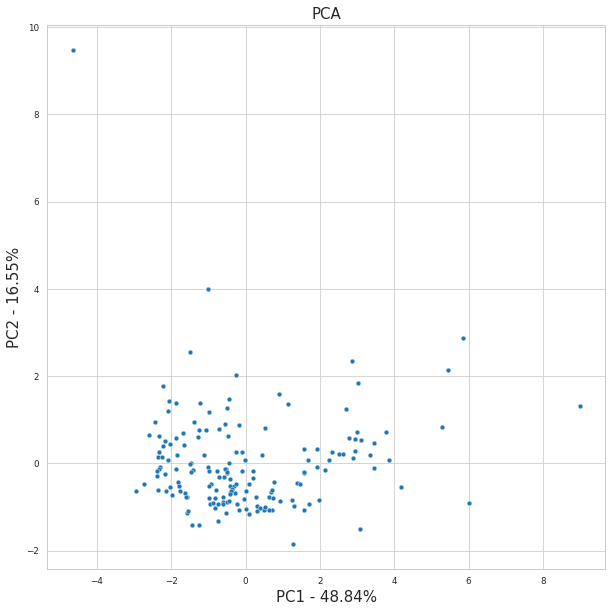

In [74]:

pca=PCA()
pca_data=pca.fit_transform(df_sc.drop('country', axis=1))
pca_var= np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC' + str(x) for x in range (1, len(pca_var)+1)]
df_pca=pd.DataFrame(data=pca_data, columns=labels)
 
plt.figure(figsize=(10,10))
sns.barplot(x=labels, y=pca_var)
plt.title('PCA', fontsize=15)
plt.xlabel('Componentes', fontsize=15)
plt.ylabel('% da variância explicada', fontsize=15)
plt.show()

plt.figure(figsize=(10,10))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.title('PCA', fontsize=15)
plt.xlabel('PC1 - {0}%'.format(pca_var[0]), fontsize=15)
plt.ylabel('PC2 - {0}%'.format(pca_var[1]), fontsize=15)
plt.show()

* Os 2 PC gerados a partir dos dados originais padronizados explicam 65% da variância dos dados.

* Com os 4 principais componentes é possível explicar 90% da variância, com uma perda de 10% da informação.

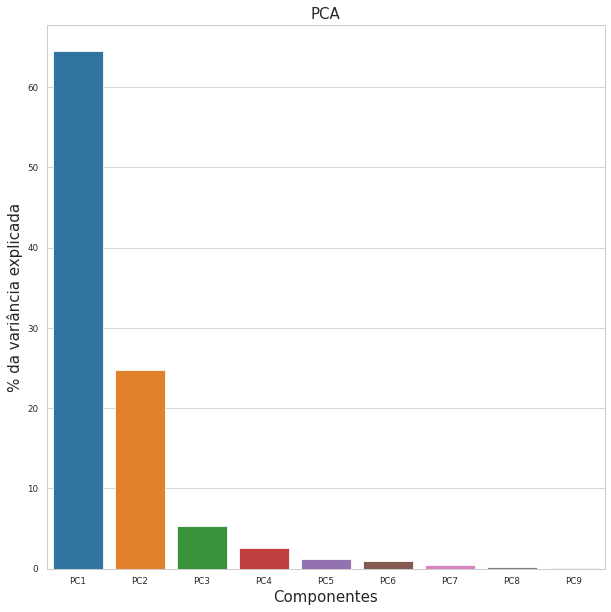

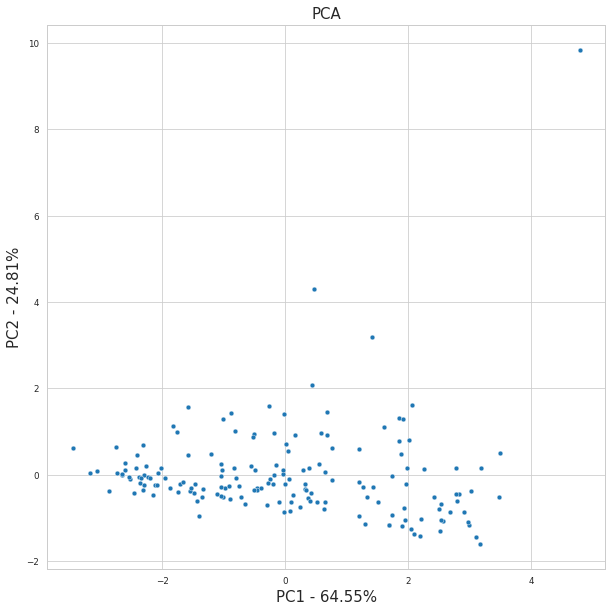

In [75]:
pca=PCA()
pca_data=pca.fit_transform(df_rb.drop('country', axis=1))
pca_var0= np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC' + str(x) for x in range (1, len(pca_var0)+1)]

plt.figure(figsize=(10,10))
sns.barplot(x=labels, y=pca_var0)
plt.title('PCA', fontsize=15)
plt.xlabel('Componentes', fontsize=15)
plt.ylabel('% da variância explicada', fontsize=15)
plt.show()

df_pca_rb=pd.DataFrame(data=pca_data, columns=labels)

plt.figure(figsize=(10,10))
sns.scatterplot(x=df_pca_rb['PC1'], y=df_pca_rb['PC2'])
plt.title('PCA', fontsize=15)
plt.xlabel('PC1 - {0}%'.format(pca_var0[0]), fontsize=15)
plt.ylabel('PC2 - {0}%'.format(pca_var0[1]), fontsize=15)
plt.show()

* O PC1 E PC2 conseguem explicar 90% da variância dos dados mas o ponto mais distante pode impactar negativamente na formação dos cluster, formando um cluster com uma única observação.

* Os 3 principais componentes explicam aproximadamente 95% da variância dos dados, com uma perda de 5% de informação.

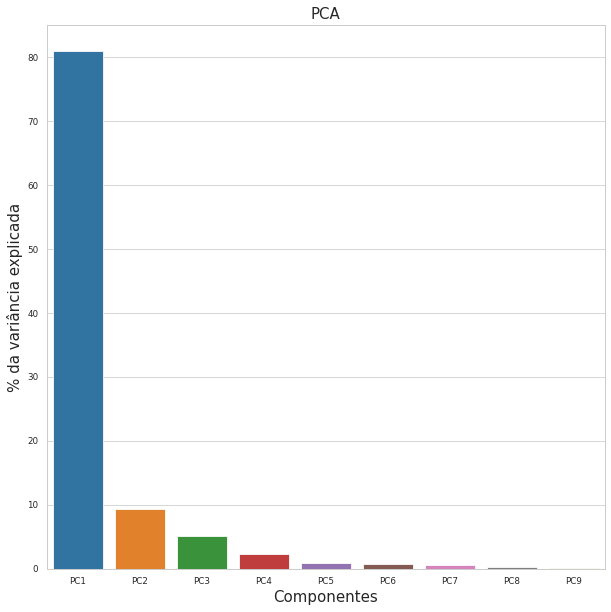

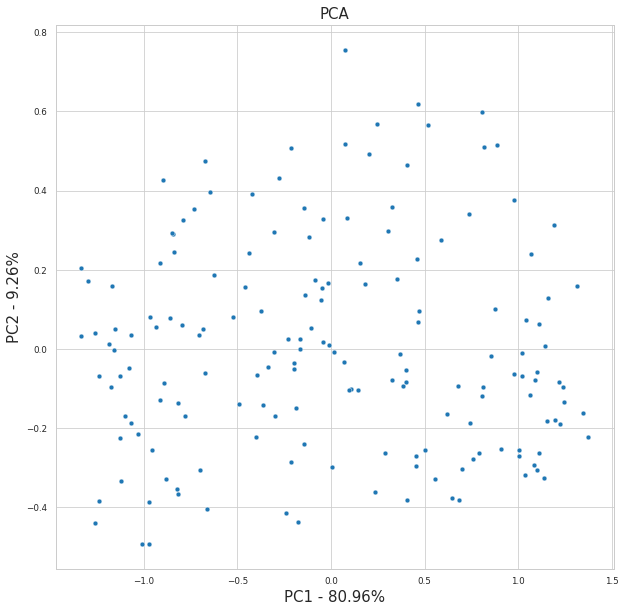

In [76]:
pca=PCA()
pca_data=pca.fit_transform(df_quantile.drop('country', axis=1))
pca_var1= np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC' + str(x) for x in range (1, len(pca_var1)+1)]
df_pca_qnt=pd.DataFrame(data=pca_data, columns=labels)

plt.figure(figsize=(10,10)) 
sns.barplot(x=labels, y=pca_var1)
plt.title('PCA', fontsize=15)
plt.xlabel('Componentes', fontsize=15)
plt.ylabel('% da variância explicada', fontsize=15)
plt.show()

plt.figure(figsize=(10,10))
sns.scatterplot(x=df_pca_qnt['PC1'], y=df_pca_qnt['PC2'])
plt.title('PCA', fontsize=15)
plt.xlabel('PC1 - {0}%'.format(pca_var1[0]), fontsize=15)
plt.ylabel('PC2 - {0}%'.format(pca_var1[1]), fontsize=15)
plt.show()

* Dentre os 3 conjuntos de dados gerados utilizando PCA este é oque  apresenta uma maior dispersão, consequentemente gera menor coesão nos grupos formados. Essa maior dispersão é consequência da normalização utilizando Quantile transformer.



In [77]:
df_pca=df_pca[['PC1','PC2','PC3','PC4']].copy()
df_pca_rb=df_pca_rb[['PC1','PC2','PC3']].copy()
df_pca_qnt=df_pca_qnt[['PC1','PC2','PC3']].copy()

print('O percentual da variância explicado df_pca:{} \n'.format(pca_var[0:4].sum()) +
      'O percentual da variância explicado df_pca_rb:{} \n'.format(pca_var0[0:3].sum()) +
      'O percentual da variância explicado df_pca_qnt:{} \n'.format(pca_var1[0:3].sum()))


O percentual da variância explicado df_pca:89.7 
O percentual da variância explicado df_pca_rb:94.67 
O percentual da variância explicado df_pca_qnt:95.23 



* Acima o percentual da variância explicado por cada conjunto de dados selecionado. 

In [78]:
def plotar_silhueta(X, param_km):

    range_n_clusters = [2, 3, 4, 5]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, **param_km)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=160, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()

In [79]:
param_km = {
    'init' : 'k-means++',
    'n_init' : 10,
    'max_iter' : 300,
    'random_state' : 0
}

In [80]:
def plot_agrup(pontos,centroides,rotulos,tamanho):
  fig, ax =plt.subplots(figsize=(11,11))

  ax.scatter(x=pontos.iloc[:,0],y=pontos.iloc[:,1], c=rotulos, marker="o",edgecolor="black",s=tamanho)

  ax.scatter(x=centroides[:,0], y=centroides[:,1], c="red", marker="*",edgecolor="black",s=tamanho*4)

  plt.plot()

* As Funções acima serão utilizadas para plotar os agrupamentos e o gráfico de silhueta que ira auxiliar na análise dos clusters formados.

[]

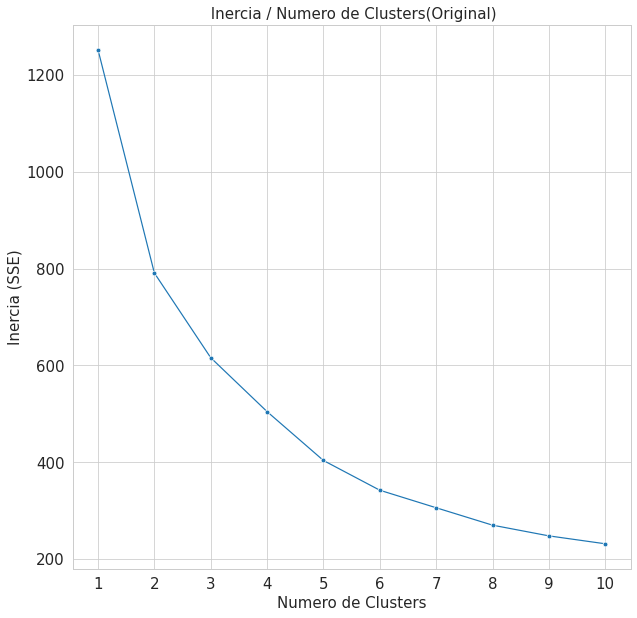

In [81]:
dat=df_pca
inercia=[]
#Definição numero de grupos a serem testados
K_samples=list(range(1,11))
for k in K_samples:
  km=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300 )
  km.fit(dat)
  inercia.append(km.inertia_)
;
plt.figure(figsize=(10,10))
sns.lineplot(x=K_samples,y=inercia, marker='o')
plt.grid(b=True, axis='y')
plt.xticks(ticks=K_samples, size=15)
plt.yticks(size=15)
plt.xlabel("Numero de Clusters", fontsize=15)
plt.ylabel("Inercia (SSE)", fontsize=15)
plt.title((" Inercia / Numero de Clusters"+'(Original)'), fontsize=15 )
plt.plot()

* Observando o gráfico do cotovelo pela inercia não fica claro qual o quantidade ideal de clusters, porém observando a silhueta, a quantidade ideal para esse conjunto seria de 2, com silhueta_score médio de 0.44.


For n_clusters = 2 The average silhouette_score is : 0.4445091375858017
For n_clusters = 3 The average silhouette_score is : 0.33020145731914063
For n_clusters = 4 The average silhouette_score is : 0.34769316073445483
For n_clusters = 5 The average silhouette_score is : 0.3465484702237855


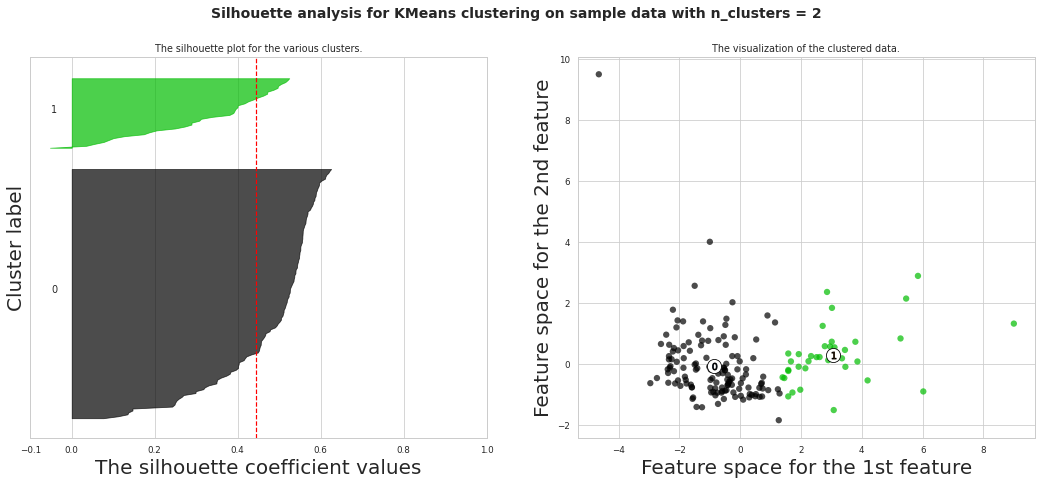

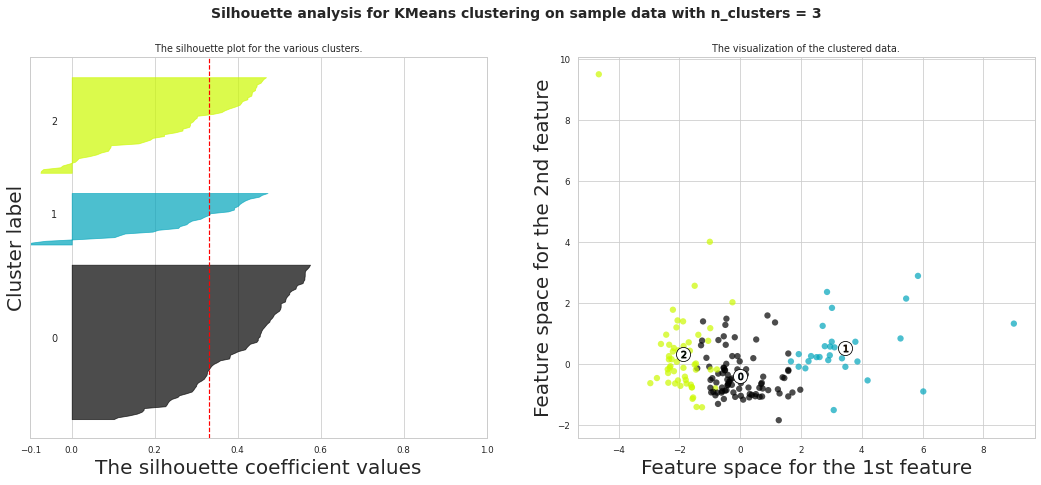

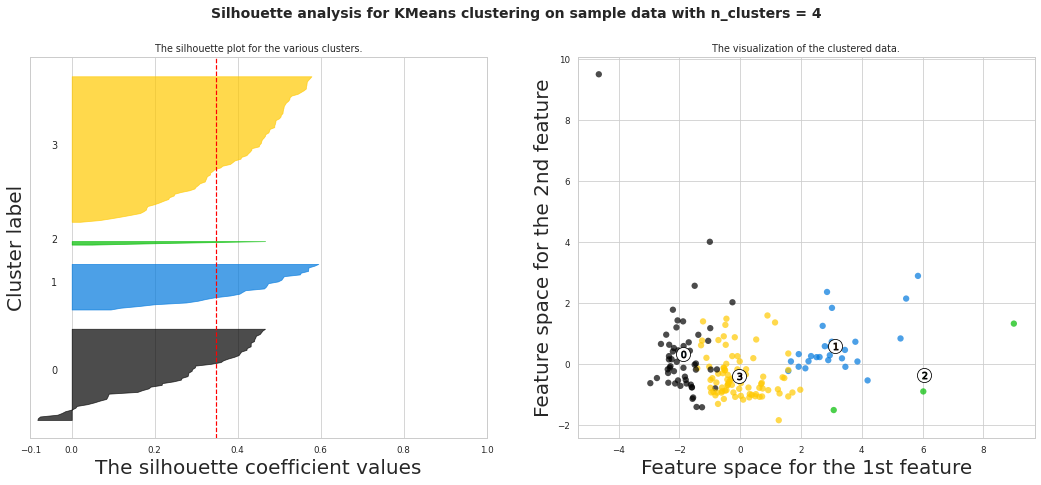

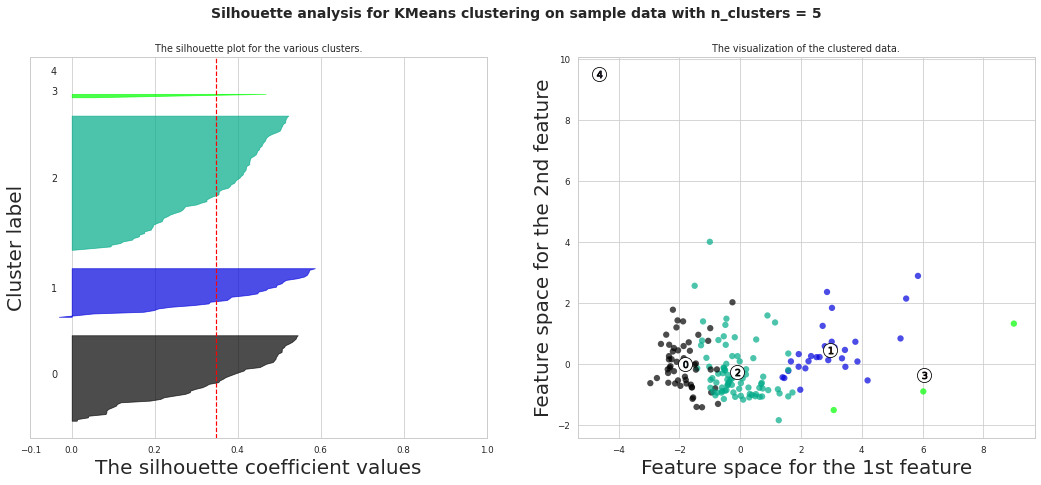

In [82]:
plotar_silhueta(df_pca.values, param_km)

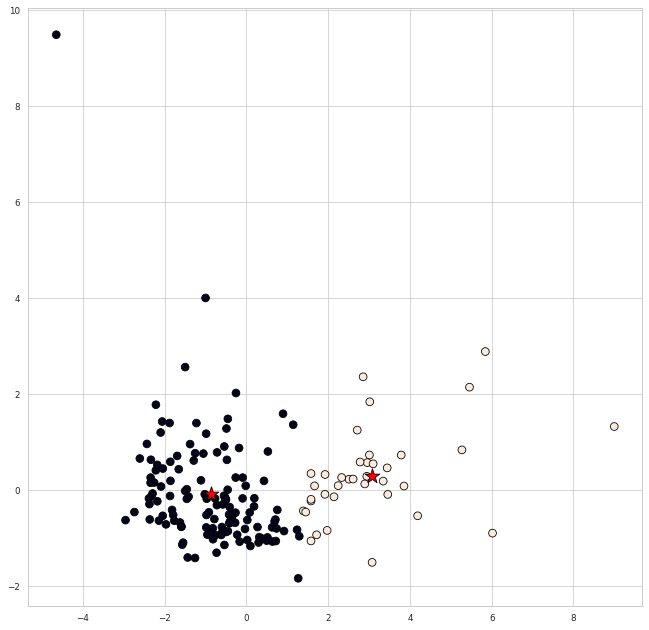

In [83]:
KM=KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
label_km=KM.fit_predict(df_pca.values)
plot_agrup(pontos=df_pca,centroides=KM.cluster_centers_, rotulos=label_km,tamanho=60)
data_sc=df_sc.copy()
data_sc['cluster']=label_km

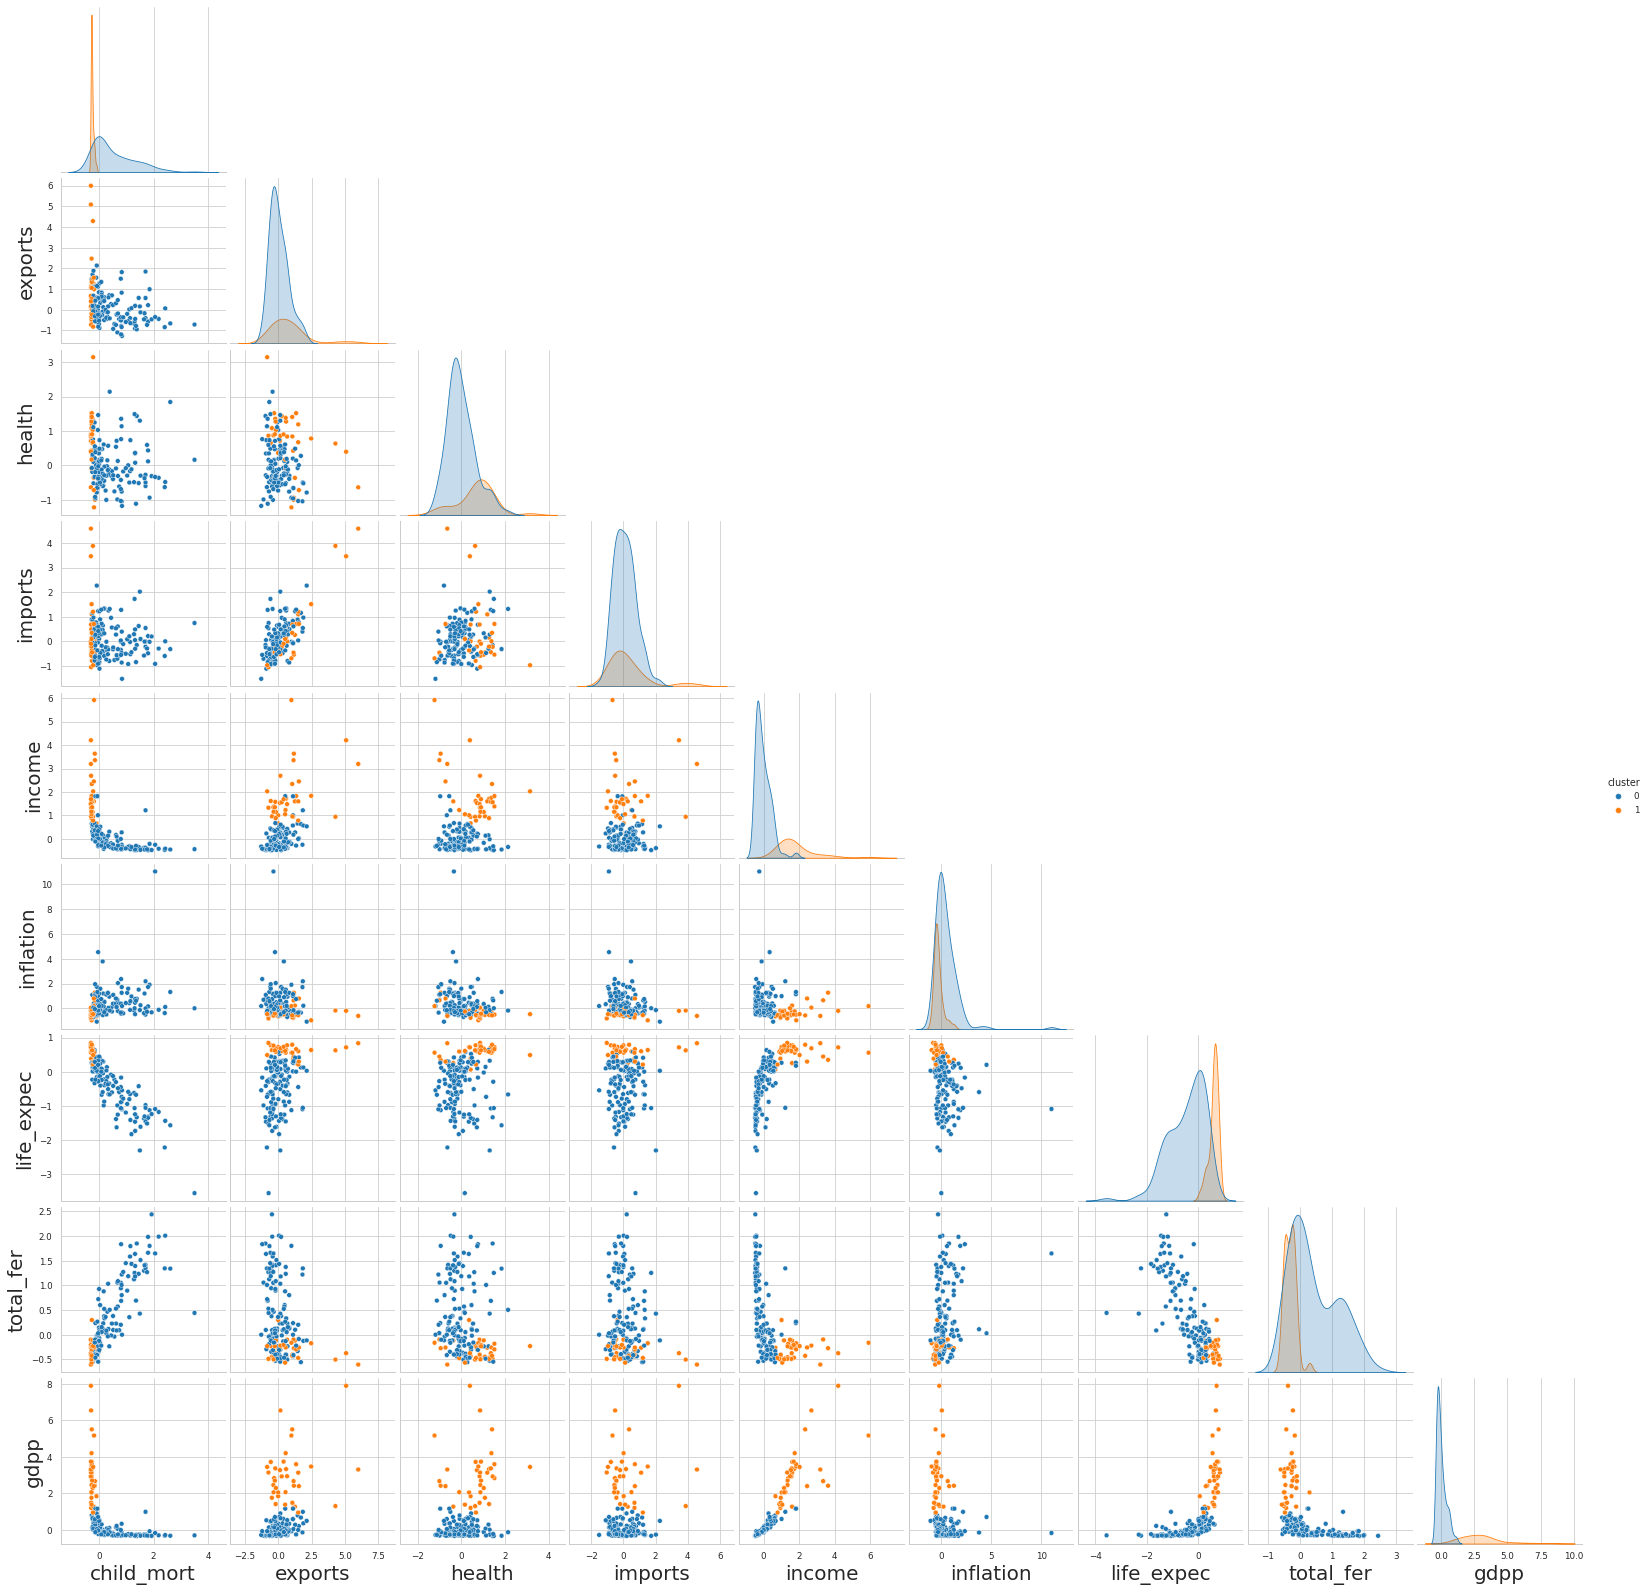

In [84]:
sns.pairplot(data=data_sc, hue='cluster', corner=True)

* Os dados nesse conjunto estão mais sobrepostos e os grupos não foram divididos proporcionalmente (Desbalanceado)


[]

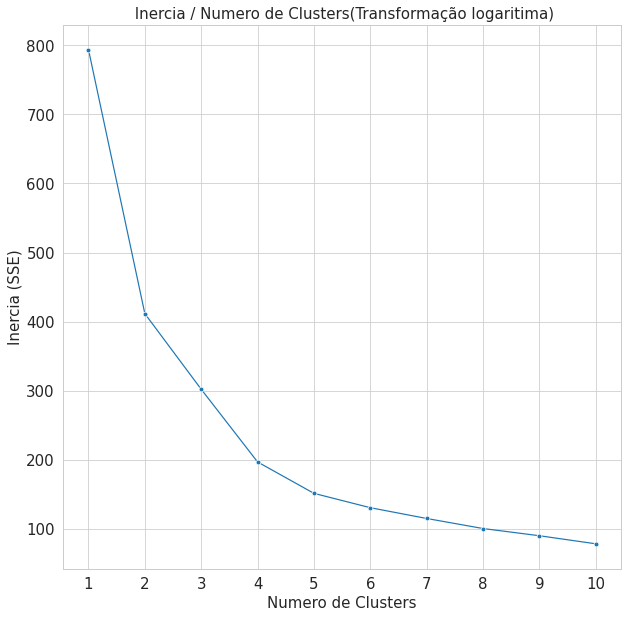

In [85]:
dat=df_pca_rb
inercia=[]
#Definição numero de grupos a serem testados
K_samples=list(range(1,11))
for k in K_samples:
  km=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300 )
  km.fit(dat)
  inercia.append(km.inertia_)
;
plt.figure(figsize=(10,10))
sns.lineplot(x=K_samples,y=inercia, marker='o')
plt.grid(b=True, axis='y')
plt.xticks(ticks=K_samples, size=15)
plt.yticks(size=15)
plt.xlabel("Numero de Clusters", fontsize=15)
plt.ylabel("Inercia (SSE)", fontsize=15)
plt.title((" Inercia / Numero de Clusters"+'(Transformação logaritima)'), fontsize=15 )
plt.plot()

* Para esse conjunto de dados, a quantidade ideal de grupos é 4, por conta do ponto mais afastado que acaba formando um cluster que contém apenas uma observação.

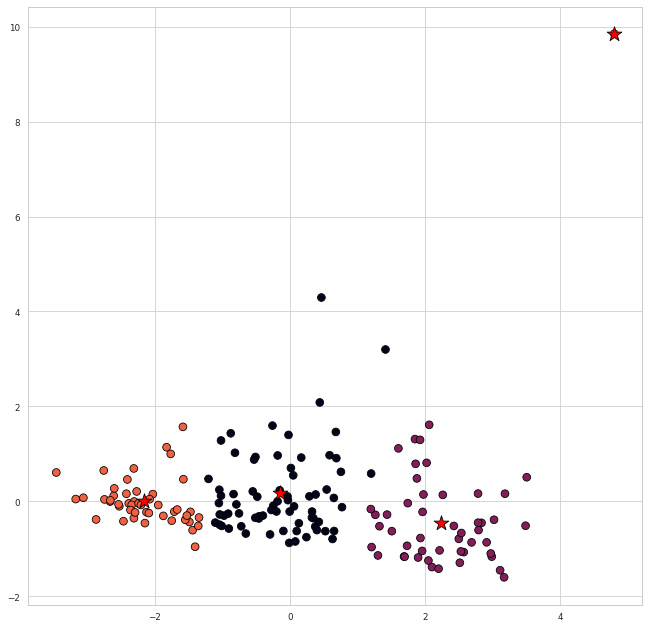

In [86]:
KM=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300,random_state=0)
label_km_rb=KM.fit_predict(df_pca_rb.values)
plot_agrup(pontos=df_pca_rb,centroides=KM.cluster_centers_, rotulos=label_km_rb,tamanho=60)
data_rb=df_rb.copy()
data_rb['cluster']=label_km_rb

* A observação mais destoante no gráfico, como previsto impactou negativamente na formação dos grupos. 

For n_clusters = 2 The average silhouette_score is : 0.45299137825681296
For n_clusters = 3 The average silhouette_score is : 0.4581503694504569
For n_clusters = 4 The average silhouette_score is : 0.4145435957153497
For n_clusters = 5 The average silhouette_score is : 0.421176580668363


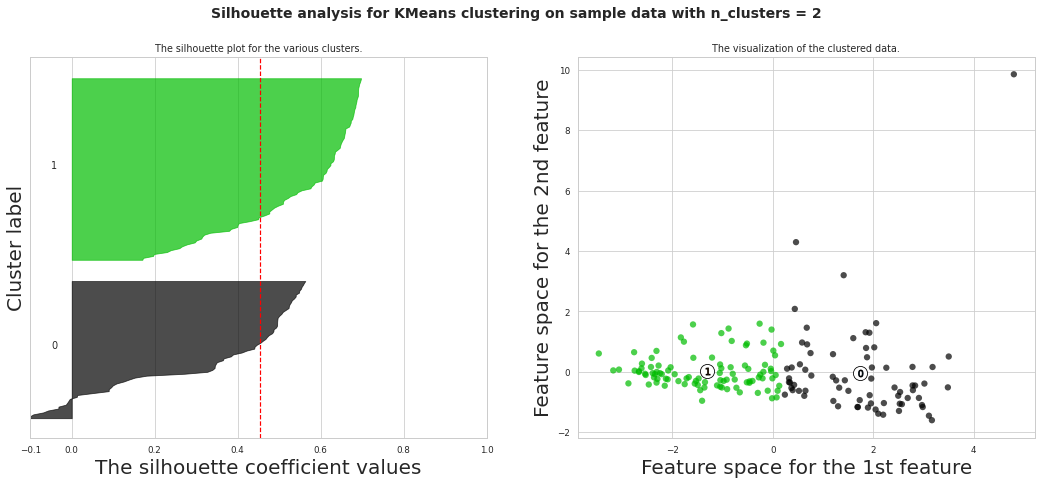

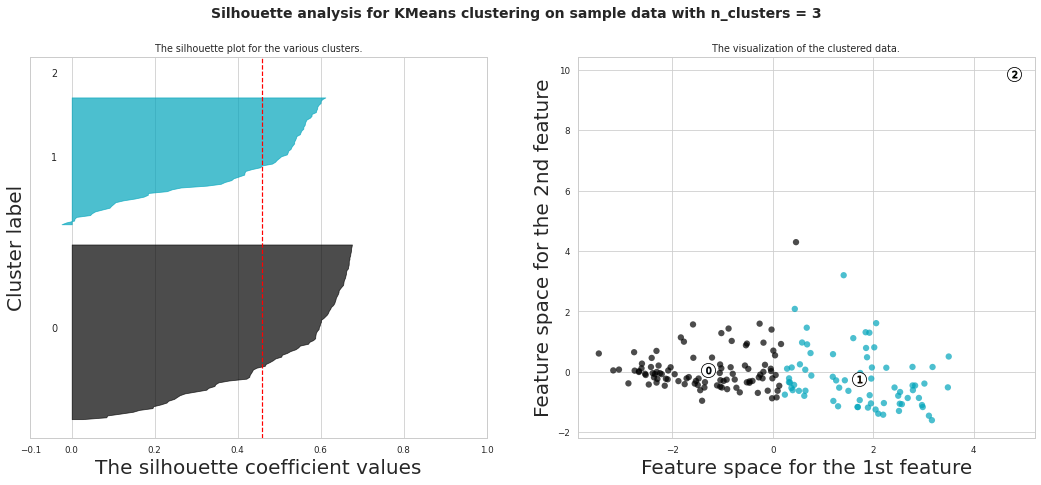

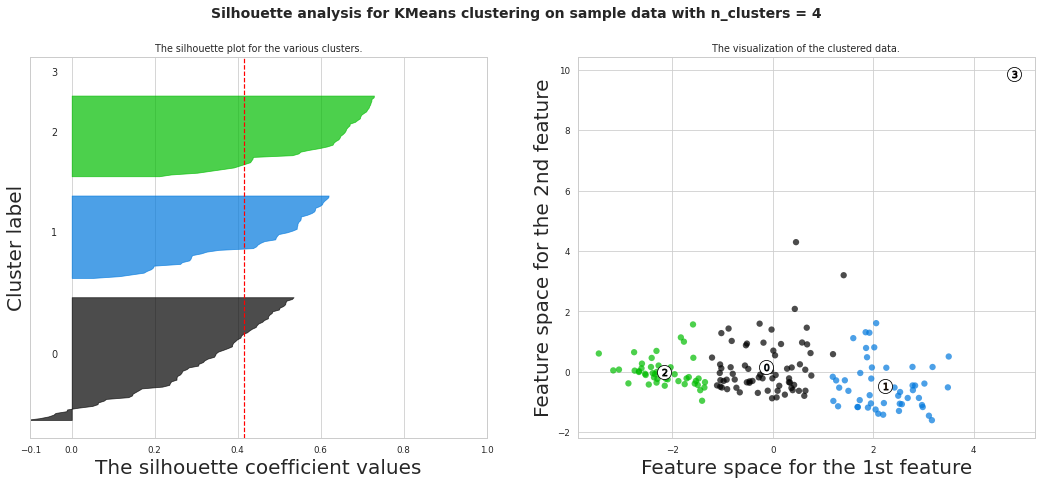

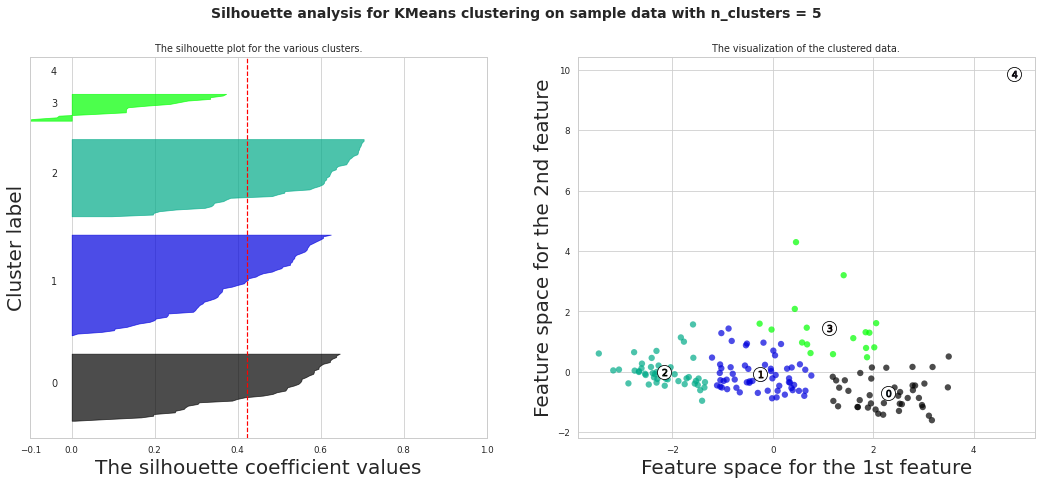

In [87]:
plotar_silhueta(df_pca_rb.values, param_km)

* Observando o Scatterplot a observação que forma o cluster 4 tem características mais próximas do cluster 1.

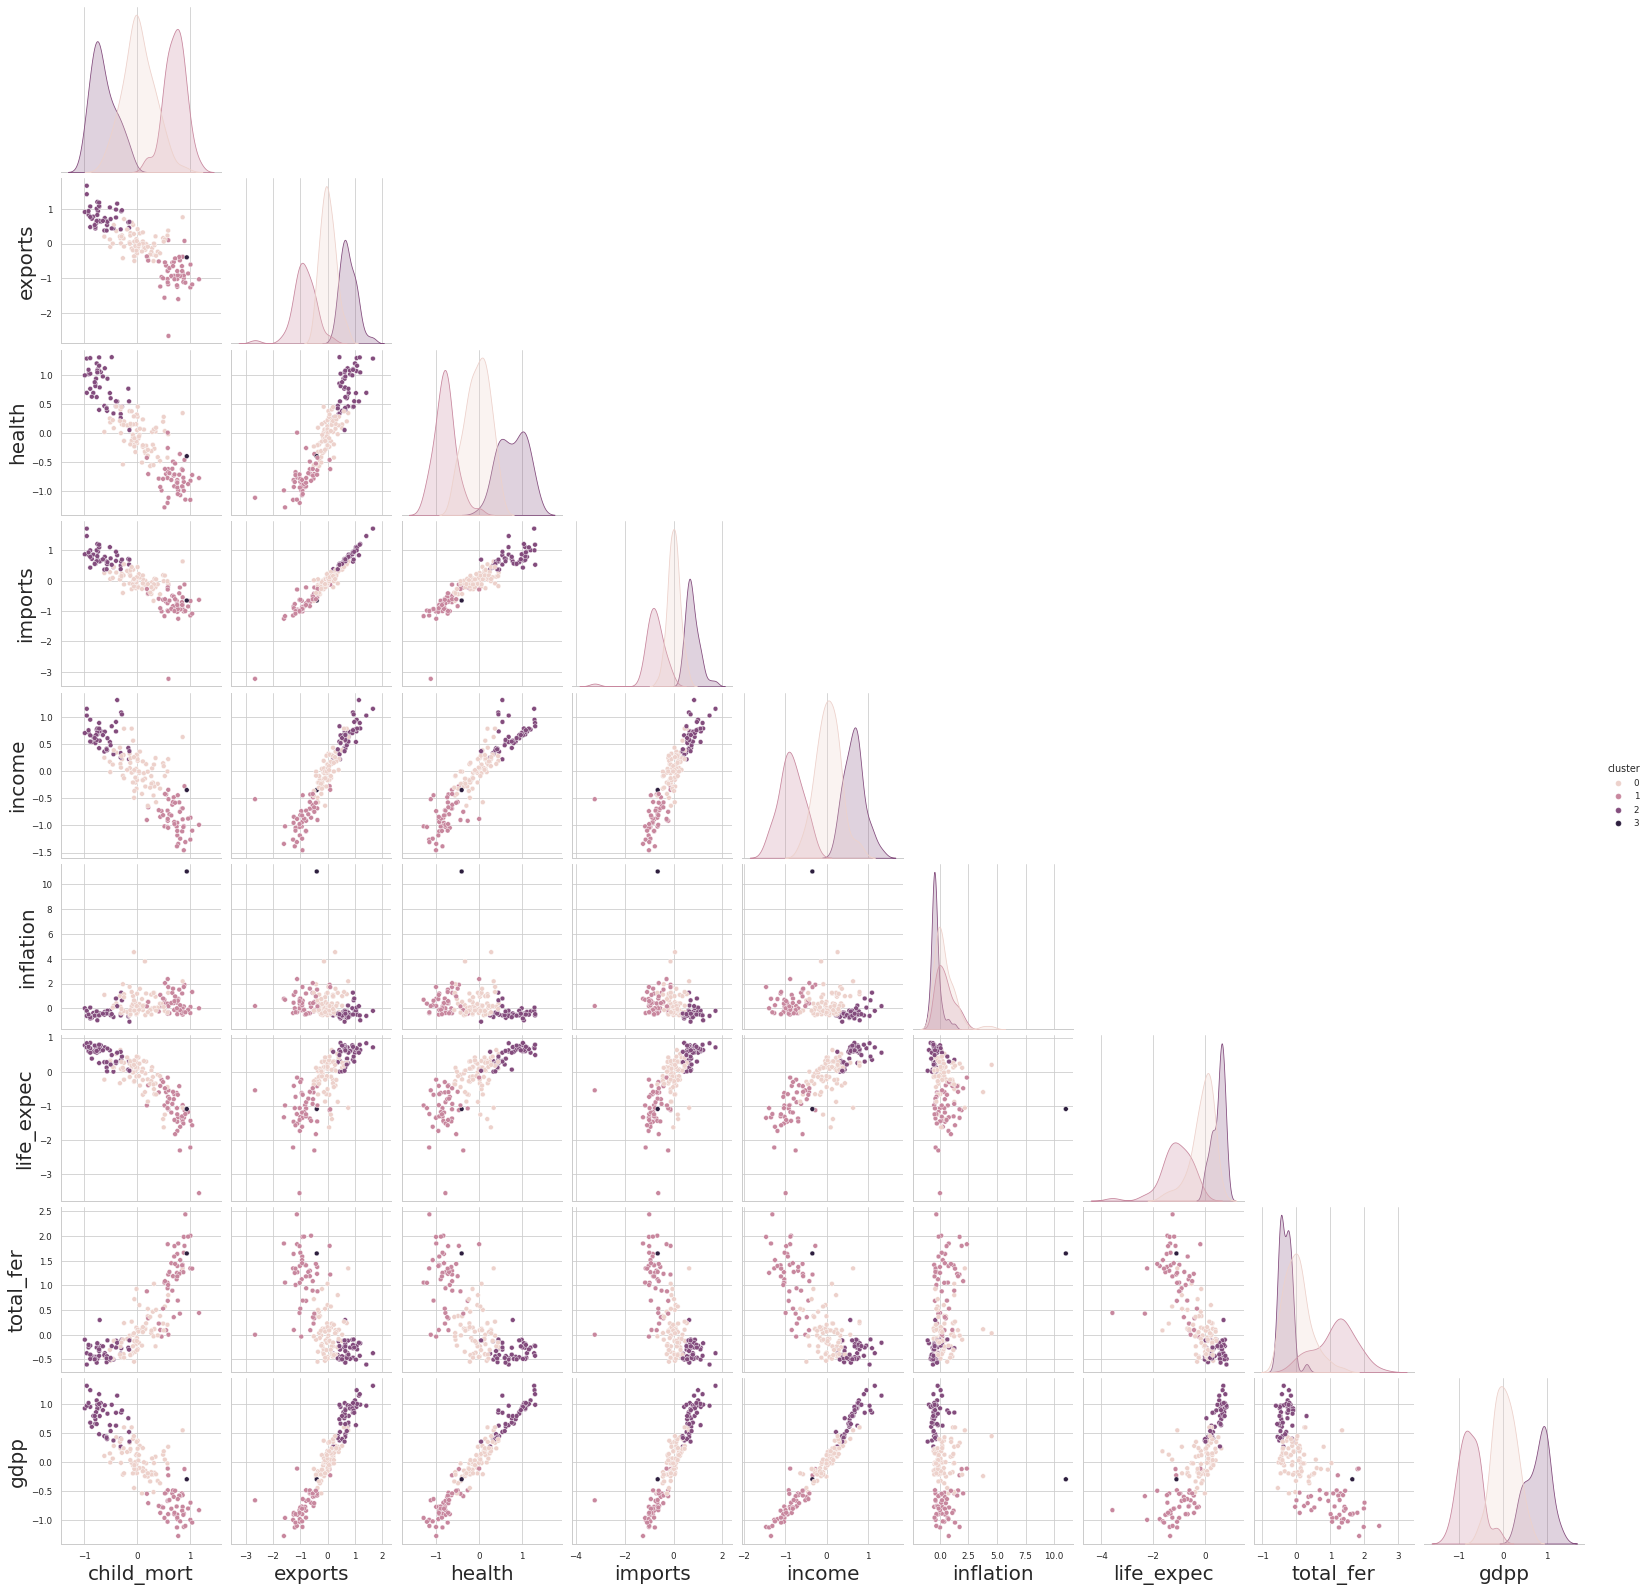

In [88]:
sns.pairplot(data=data_rb, hue='cluster', corner=True)

[]

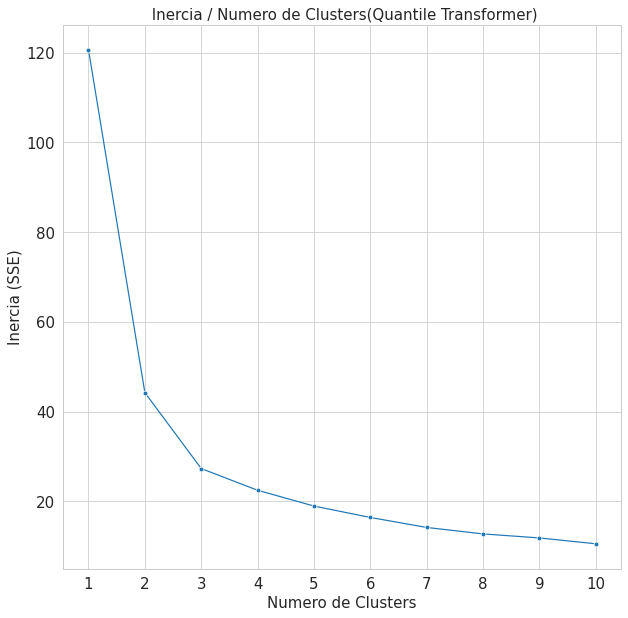

In [89]:
dat=df_pca_qnt
inercia=[]
#Definição numero de grupos a serem testados
K_samples=list(range(1,11))
for k in K_samples:
  km=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300 )
  km.fit(dat)
  inercia.append(km.inertia_)
;
plt.figure(figsize=(10,10))
sns.lineplot(x=K_samples,y=inercia, marker='o')
plt.grid(b=True, axis='y')
plt.xticks(ticks=K_samples, size=15)
plt.yticks(size=15)
plt.xlabel("Numero de Clusters", fontsize=15)
plt.ylabel("Inercia (SSE)", fontsize=15)
plt.title((" Inercia / Numero de Clusters"+'(Quantile Transformer)'), fontsize=15 )
plt.plot()

* Para o último conjunto, a quantidade ideal de cluster é 3. Apesar da silhueta do grupo 0 impactar negativamente na silhueta média, esse conjunto foi o que obteve melhor silhueta média.

For n_clusters = 2 The average silhouette_score is : 0.5008394462638173
For n_clusters = 3 The average silhouette_score is : 0.43481301028250685
For n_clusters = 4 The average silhouette_score is : 0.37456960366949676
For n_clusters = 5 The average silhouette_score is : 0.3768306562834497


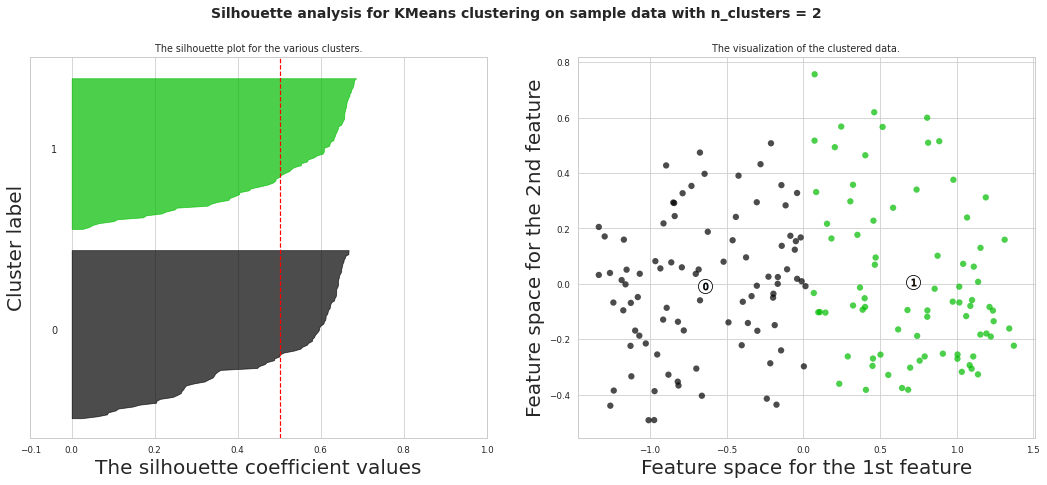

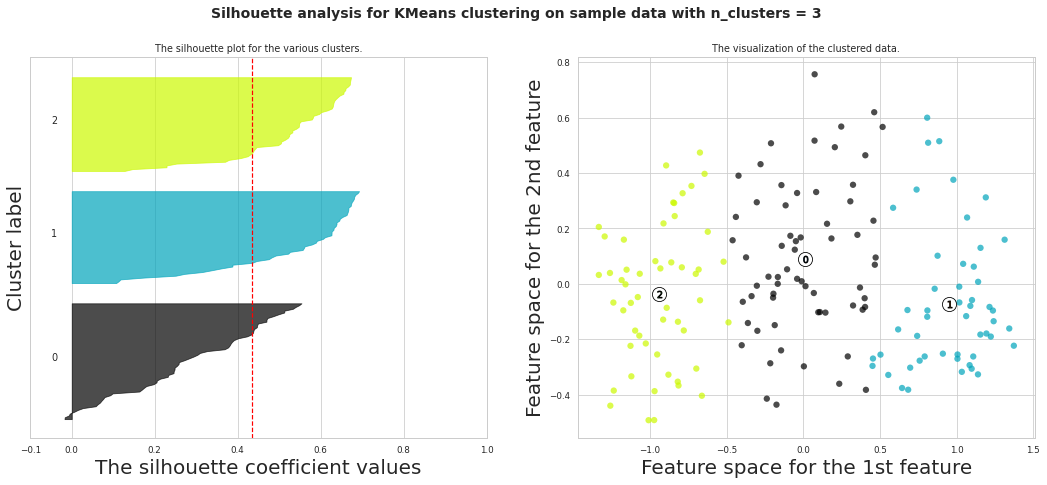

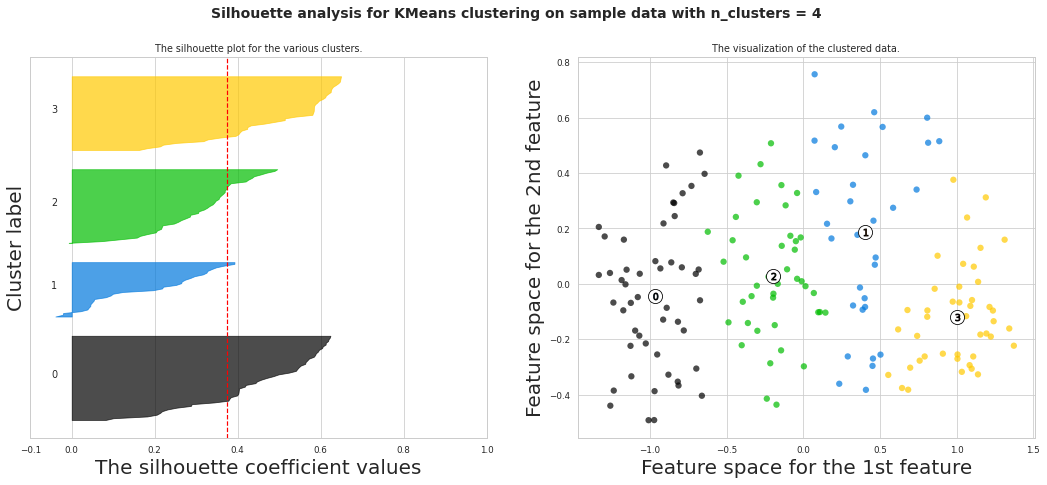

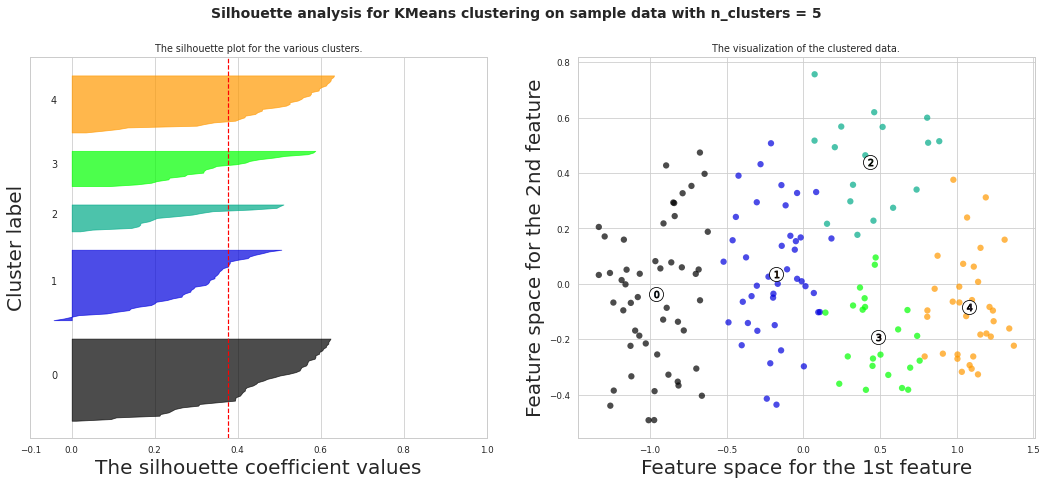

In [90]:
plotar_silhueta(df_pca_qnt.values, param_km)

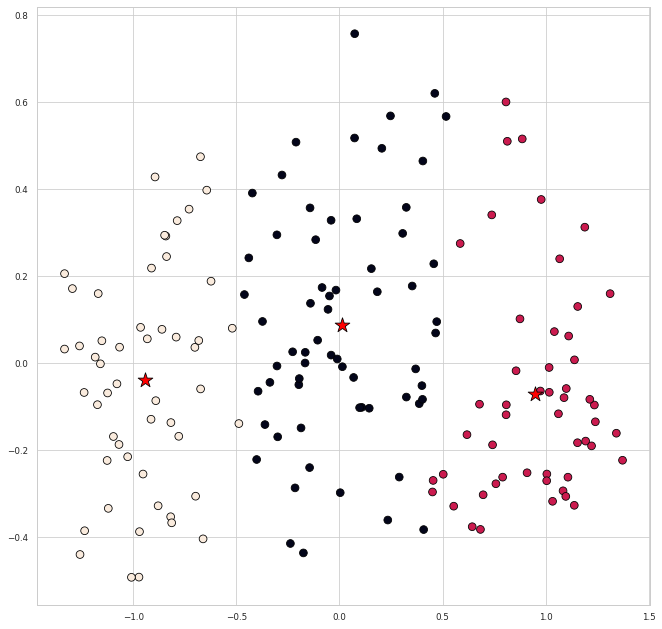

In [91]:
KM=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
label_km_qnt=KM.fit_predict(df_pca_qnt.values)
plot_agrup(pontos=df_pca_qnt,centroides=KM.cluster_centers_, rotulos=label_km_qnt,tamanho=60)
data_qnt=df_quantile
data_qnt['cluster']=label_km_qnt

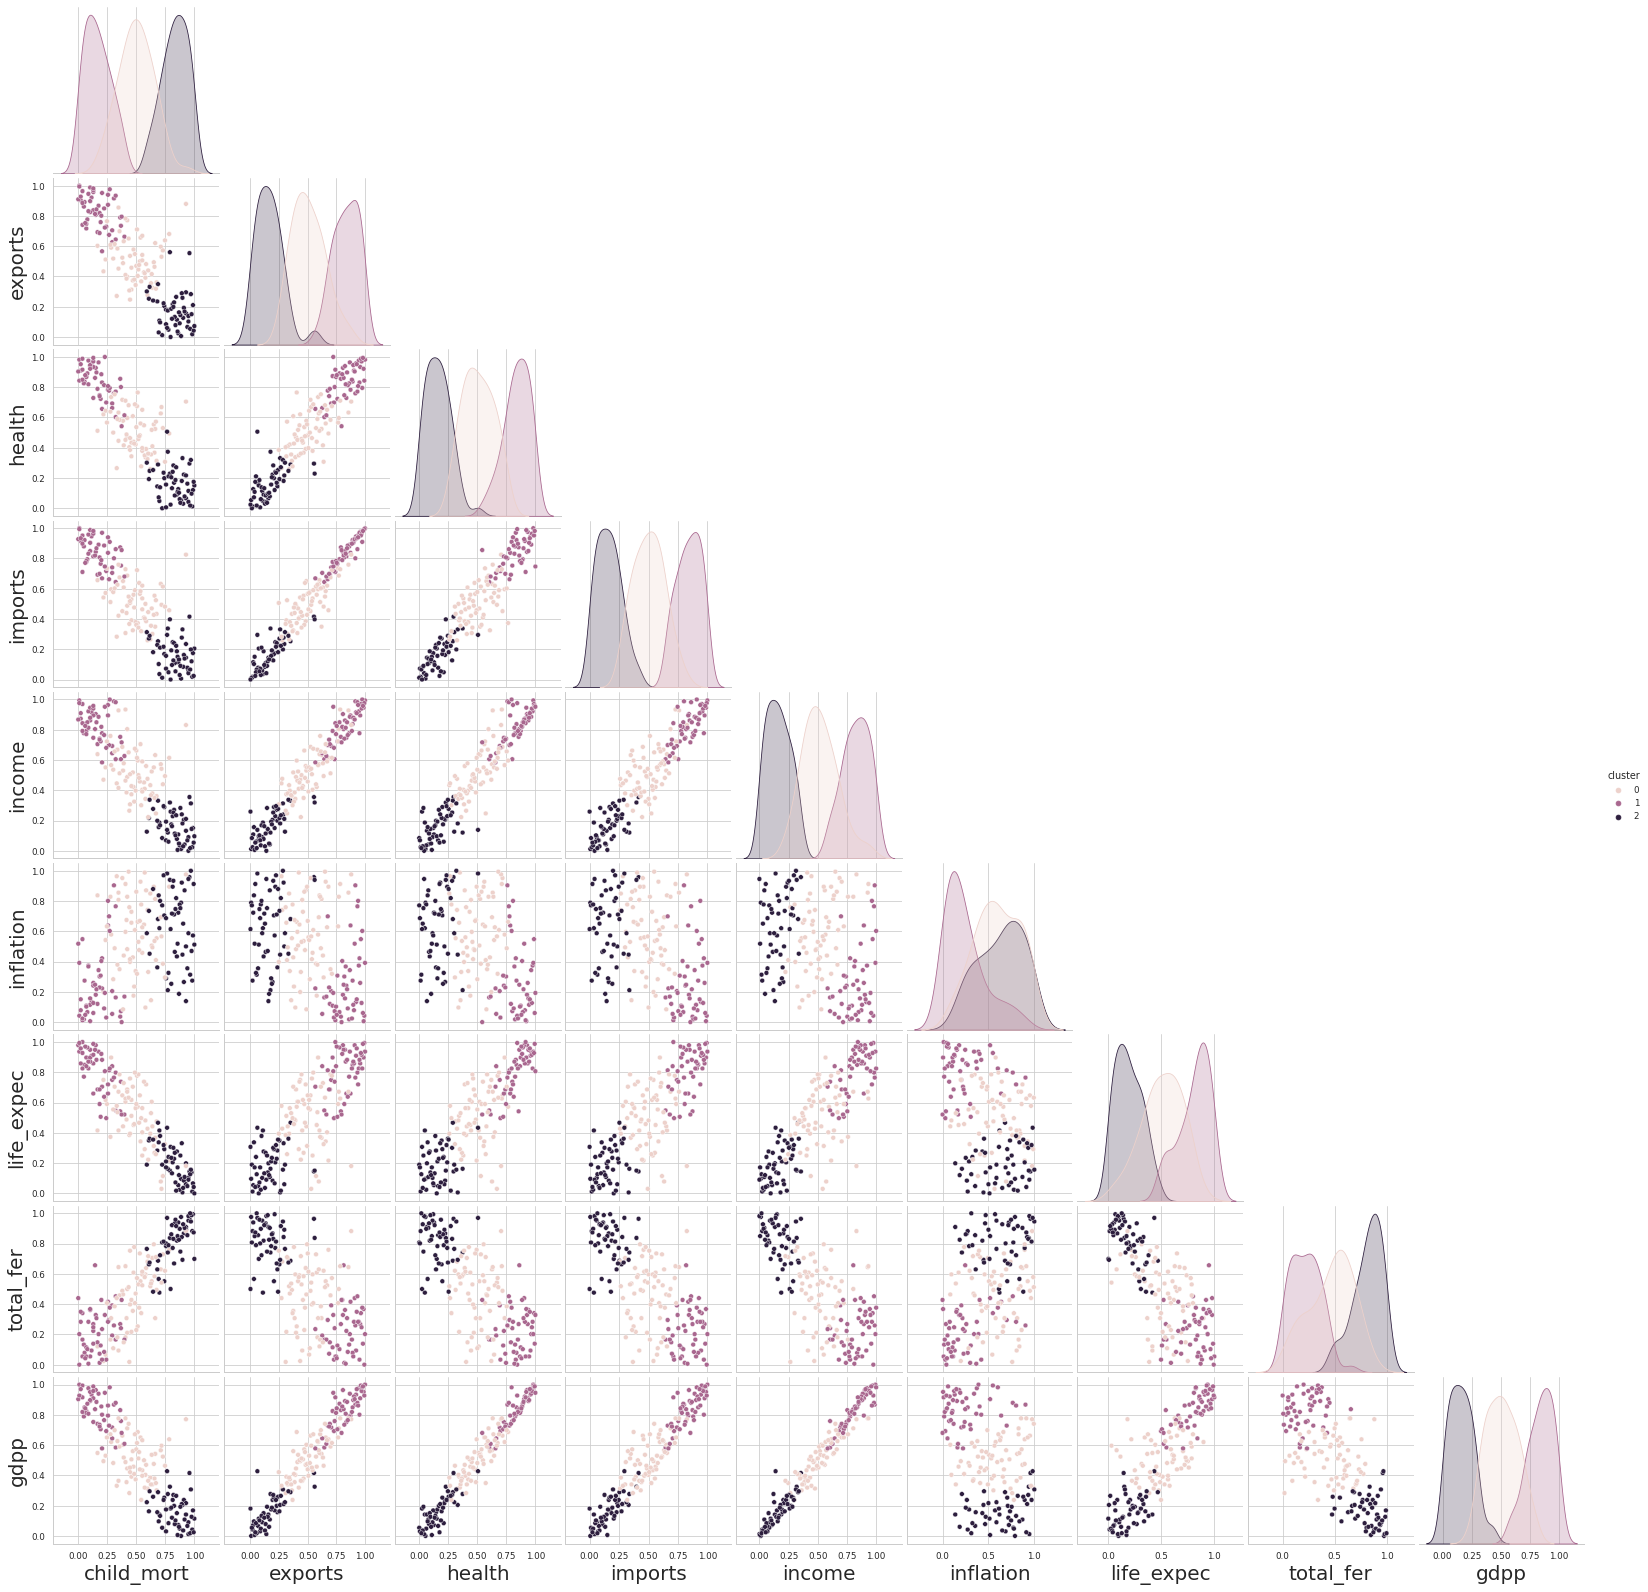

In [92]:
sns.pairplot(data=data_qnt, hue='cluster', corner=True)

* Os rótulos obtidos através gerados pelo último conjunto de dados serão os rótulos selecionados para classificar o dataset original. Levando em consideração que o gráfico do cotovelo que para 3 grupos obteve um menor Inercia.


In [93]:
from sklearn.cluster import  AgglomerativeClustering
def Agg_cluster(data):
  lnk_types=['single','complete','average','ward']
  rotulos={}
  for lnk in lnk_types:
    agg=AgglomerativeClustering(linkage=lnk, n_clusters=3).fit(data)
    rotulos[lnk]=agg.labels_ 
  return rotulos    

In [94]:
def plot_agrup(data,rotulos,esc=False,xlab=None,ylab=None):
  
  fig, axs =plt.subplots(ncols=2,nrows=2,figsize=(15,15), sharey=True)  

  if  not esc:
    fig.suptitle("Agrupamento por Linkage com dados não escalonados",size=15)
  else:
    fig.suptitle("Agrupamento por Linkage escalonados",size=15) 
  ;
  s=sns.scatterplot(x=data[:,0],y=data[:,1],hue=rotulos['single'],hue_order=(0,1,2),style=rotulos['single'],
                    style_order=(0,1,2),ax=axs[0,0], palette='bright', s=100)
  ;
  s.set_title("Single Linkage", size=15)
  axs[0,0].set(xlabel=xlab,ylabel=ylab)
  
  s1=sns.scatterplot(x=data[:,0],y=data[:,1],hue=rotulos['complete'],hue_order=(0,1,2),style=rotulos['complete'],
                     style_order=(0,1,2),ax=axs[0,1], palette='bright',s=100)
  ;
  s1.set_title("Complete Linkage", size=15)
  axs[0,1].set(xlabel=xlab,ylabel=ylab)
  
  s2=sns.scatterplot(x=data[:,0],y=data[:,1],hue=rotulos['average'],hue_order=(0,1,2),style=rotulos['average'],
                     style_order=(0,1,2),ax=axs[1,0], palette='bright',s=100)
  ;
  s2.set_title("Average Linkage",size=15)
  axs[1,0].set(xlabel=xlab,ylabel=ylab)

  s3=sns.scatterplot(x=data[:,0],y=data[:,1],hue=rotulos['ward'],hue_order=(0,1,2),style=rotulos['ward'],
                     style_order=(0,1,2),ax=axs[1,1], palette='bright',s=100)
  ;
  s3.set_title("Ward Linkage", size=15)
  axs[1,1].set(xlabel=xlab,ylabel=ylab)
 

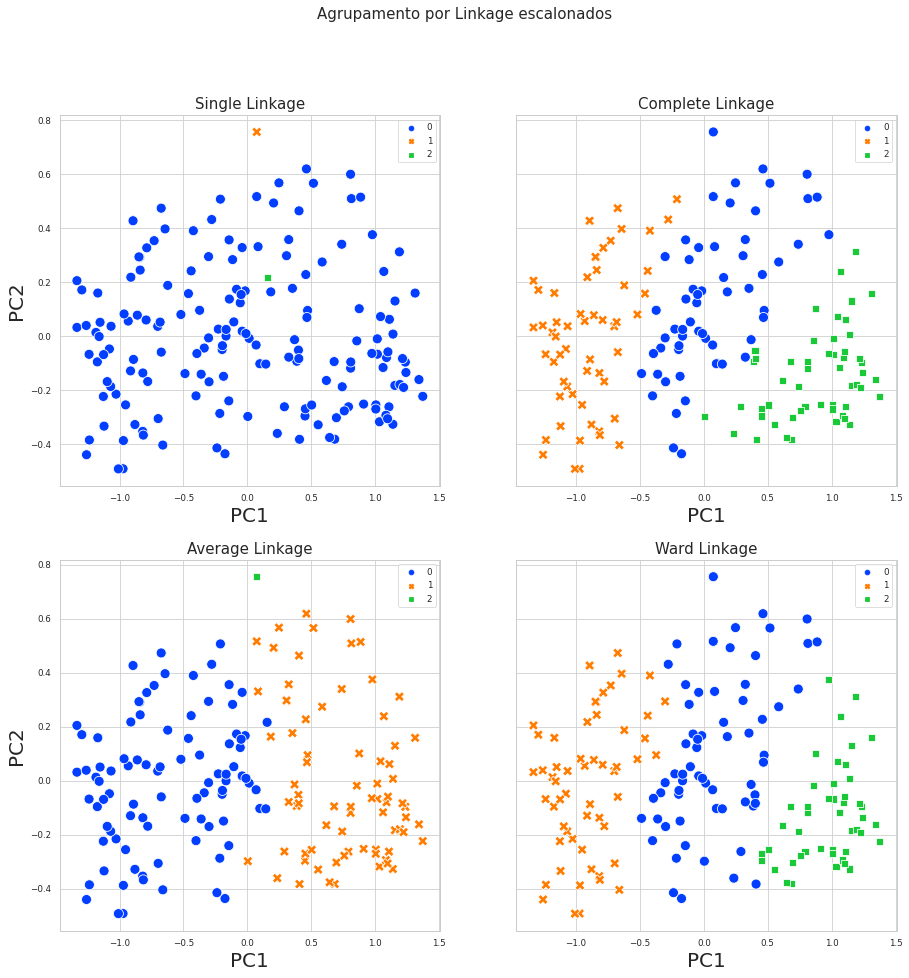

In [95]:
rotulos=Agg_cluster(df_pca_qnt)
plot_agrup(df_pca_qnt.values,rotulos,esc=True,xlab='PC1',ylab='PC2' )

* O método Ward foi o que mais se aproximou do resultado obtido utilizando o KMeans

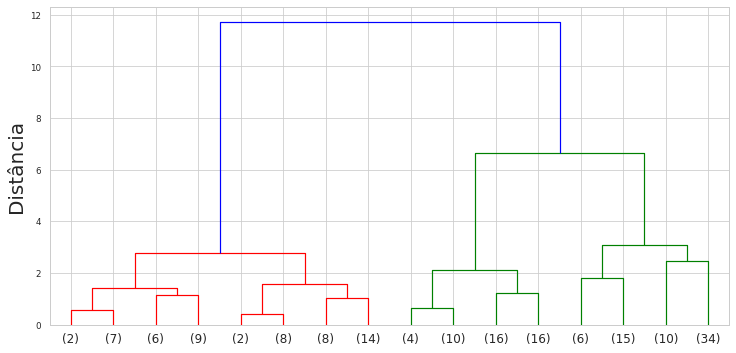

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage,set_link_color_palette
set_link_color_palette(['r', 'g', 'b'])

link = linkage(df_pca_qnt.values, method='ward', metric='euclidean')

plt.figure(figsize=(10, 5))
dd = dendrogram(link, p=3, truncate_mode='level')

plt.tight_layout()
plt.ylabel('Distância')
plt.show()

* Entre **6 e 8** encontrasse a distância limítrofe, acima de não mais grupos são divididos e abaixo dela verificamos **3 grupos, cada um com um número significativo de observações.**

### Análise dos Clusters formados

In [98]:
!pip install -q pycountry
!pip install git+git://github.com/geopandas/geopandas.git
import pycountry
import geopandas

     |████████████████████████████████| 10.1 MB 3.4 MB/s 
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-3a3i5u4p
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-3a3i5u4p
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 52.6 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.1+7.g0746be9-py2.py3-none-any.whl size=1031526 sha256=1c50225eea4489dbfa62e35088c4a4749353846bf78628508f9f290ba1e0c2ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-zk3oh7ej/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


In [99]:
data_1=df.copy()
data_1['cluster']=label_km_qnt
pd.pivot_table(data=data_1, index='cluster',aggfunc=np.median)

child_mort  exports     gdpp  ...  inflation  life_expec  total_fer
cluster                                ...                                  
0             19.25     34.1   4670.0  ...      6.755        73.4      2.440
1              4.80     50.2  30800.0  ...      1.160        79.8      1.720
2             82.05     22.8    777.5  ...      8.785        60.8      4.965

[3 rows x 9 columns]

In [100]:
data_2=df1.copy()
data_2['cluster']=label_km_qnt
pd.pivot_table(data=data_2, index='cluster',aggfunc=np.median)

child_mort    exports     gdpp  ...  inflation  life_expec  total_fer
cluster                                  ...                                  
0             19.25   1763.530   4670.0  ...      6.755        73.4      2.440
1              4.80  10964.600  30800.0  ...      1.160        79.8      1.720
2             82.05    170.914    777.5  ...      8.785        60.8      4.965

[3 rows x 9 columns]

* O cluster 0 tem características intermediárias entre o cluster 1 e 2. Oq representaria países em desenvolvimento.

* O cluster 1 apresenta baixa mortalidade infantil, uma alta renda e a expectativa de vida por cidadão e menor taxa de fertilidade mediana.

* Já o cluster 2 apresenta uma alta taxa de mortalidade infantil, 4x maior que a do cluster 0 e 16x maior que do cluster 1, baixa renda por cidadão e uma expectativa de vida média entre 13 e 20 menor que os outros 2 clusters.

In [101]:
data_2['cluster'].value_counts()

0    64
2    52
1    51
Name: cluster, dtype: int64

In [102]:
data_2['income_by_fer']=''
for r in range(data_2.shape[0]):
  data_2['income_by_fer'][r]=float((data_2['income'][r])/(data_2['total_fer'][r]))
  data_2['income_by_fer']=pd.to_numeric(data_2['income_by_fer'])

* Levando em consideração que quanto melhor os índices de um país maior é sua renda por cidadão e menor é a taxa de fertilidade. a métrica para escolher quais países mais necessitam de ajuda foi a renda/taxa de fertilidade.
  * Quanto menor a razão entre esses dois valores maior a necessidade de ajuda daquele país.

In [103]:
data_2.nsmallest(5,'income_by_fer')

country  child_mort   exports  ...  gdpp  cluster  income_by_fer
37   Congo, Dem. Rep.       116.0  137.2740  ...   334        2      93.119266
112             Niger       123.0   77.2560  ...   348        2     108.678238
26            Burundi        93.6   20.6052  ...   231        2     122.044728
88            Liberia        89.3   62.4570  ...   327        2     139.442231
106        Mozambique       101.0  131.9850  ...   419        2     165.107914

[5 rows x 12 columns]

In [104]:
CODE=[]
for country in data_2['country']:
  try:
    code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
    CODE.append(code)
  except:
    CODE.append('None')
; 
data_2['CODE']=CODE


In [105]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=data_2.merge(world,on='CODE')
merge.drop('name', axis=1, inplace=True)


In [106]:
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
location.columns=['country','latitude','longitude']
merge=merge.merge(location,on='country')

In [107]:
merge= geopandas.GeoDataFrame(merge)

Text(0.5, 1.0, 'Renda por taxa de fertilidade para diferentes países.')

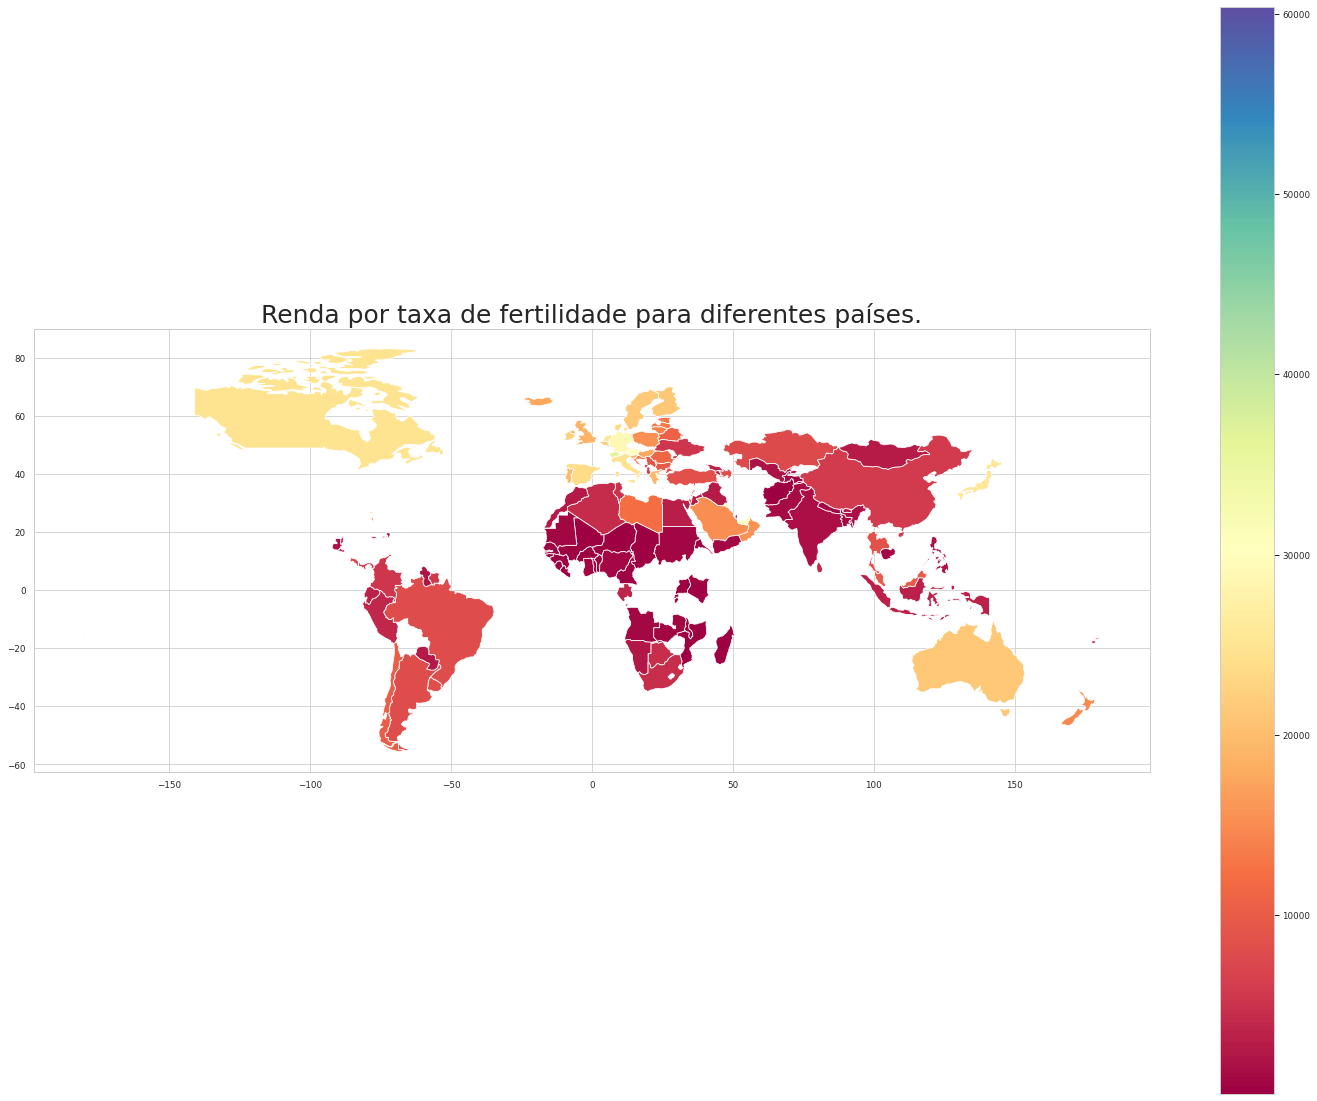

In [111]:
merge.plot(column='income_by_fer',
           figsize=(25, 20),
           legend=True, cmap='Spectral')

plt.title('Renda por taxa de fertilidade para diferentes países.',fontsize=25)

* Visualizando a métrica criada é possível notar que os países com maior necessidade de ajuda encontram-se na Africa e Asia.